
<Html>
    <body>
        <h1>Stock Market Prediction</h1>
        <h2>Stock Market Data From Yahoo Finance</h2><br>
        <p>Have you ever wondered what would happen if one could actually predict the stock market and tell what would happen in the upcomming days.<br>
        Thinking about stock market prediction one could always question how is it possible to predict stock market.<br>
        Let me clear your confusion.<br>
        One just cannot predict the stock market with a 100% surety about whats coming next but that is the thing what all the big data scientist are currently working on. <br>
        We can actually predict what could possibly happen based on the current trend of hoe the company is growing and how well it is performing in the market by analysing the charts and using mathematical models converting it into codes and then showing the output<br>
        In this Project I tried to do the same and predict the Stock Market of some of the tech Giants accross the globe<br></p>
    </body>
</html>

In [1]:
from __future__ import division

In [2]:
# For Data Processing
import numpy as np
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [3]:
# For reading stock data from yahoo
from pandas_datareader import DataReader
from pandas import Series, DataFrame

In [4]:
#Extrating dataset from Yahoo Finance
#List of Tech campanies stocks for analytics
end = datetime.datetime.now()
start = datetime.datetime(end.year-1,end.month,end.day)

# Set DataFrame as the Stock Ticker
globals()['NFLX'] = DataReader('NFLX','yahoo',start,end)

In [5]:
NFLX.head()

High         Low        Open       Close    Volume  \
Date                                                                   
2018-02-26  295.649994  287.010010  288.750000  294.160004  10268600   
2018-02-27  297.359985  290.589996  294.769989  290.609985   9416500   
2018-02-28  295.750000  290.779999  293.100006  291.380005   7653500   
2018-03-01  295.250000  283.829987  292.750000  290.390015  11932100   
2018-03-02  301.179993  283.230011  284.649994  301.049988  13345300   

             Adj Close  
Date                    
2018-02-26  294.160004  
2018-02-27  290.609985  
2018-02-28  291.380005  
2018-03-01  290.390015  
2018-03-02  301.049988

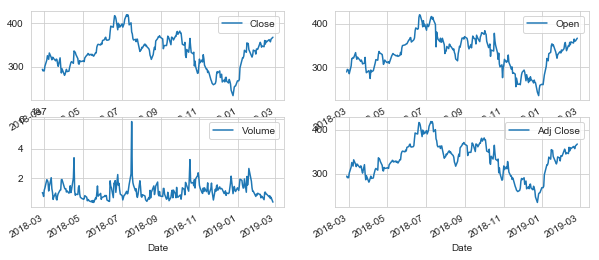

In [6]:
#ploting all the columns of My Dataset 
plt.figure()
plt.subplot(2,2,1)
NFLX['Close'].plot(legend=True, figsize=(10,4))
plt.subplot(222)
NFLX['Open'].plot(legend=True, figsize=(10,4))
plt.subplot(223)
NFLX['Volume'].plot(legend=True, figsize=(10,4))
plt.subplot(224)
NFLX['Adj Close'].plot(legend=True, figsize=(10,4))

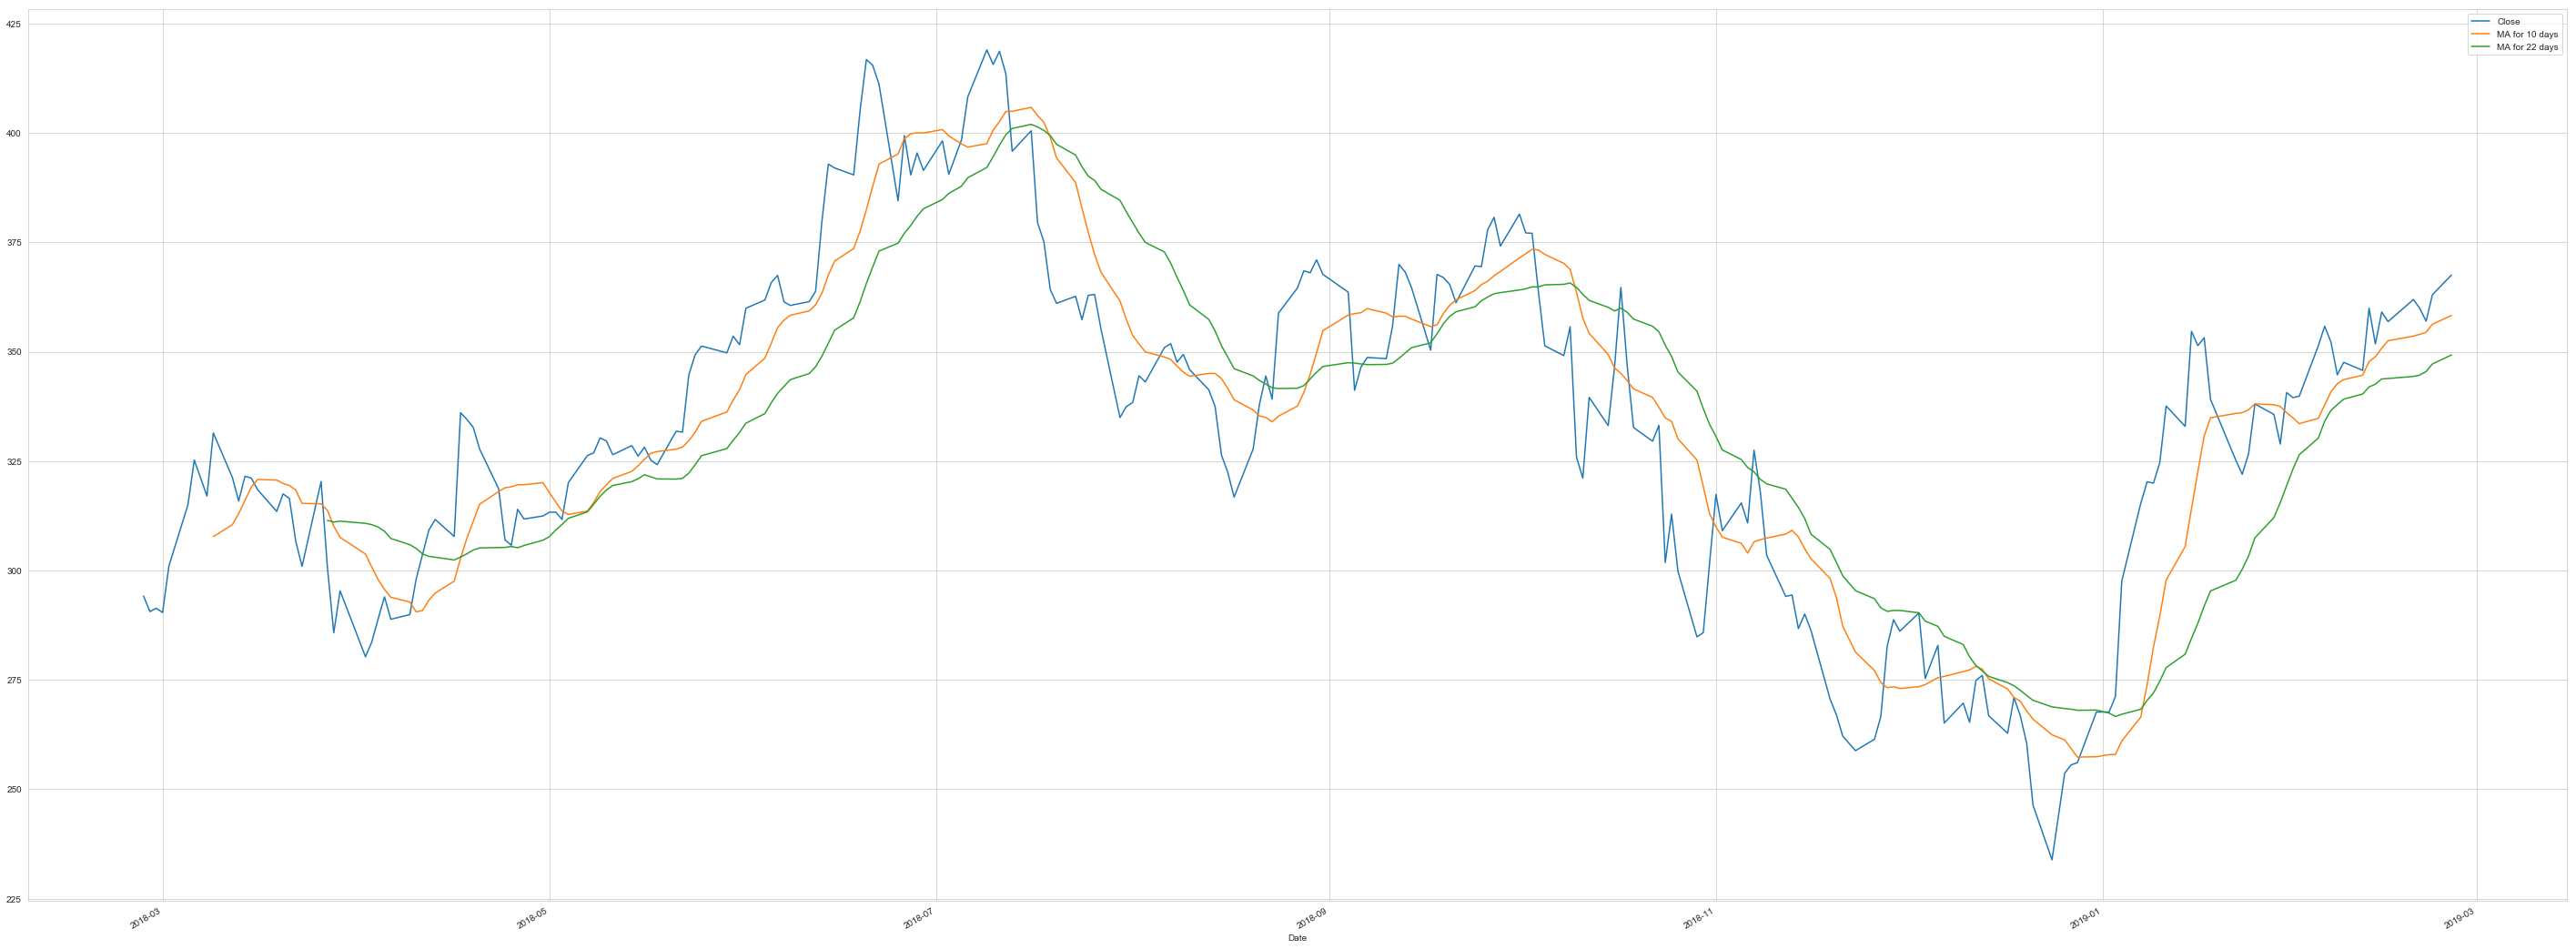

In [52]:
#1 Moving Average(MA)
MA_day = [10,22]
for ma in MA_day:
    column_name = 'MA for %s days' %(str(ma))
    NFLX[column_name] = NFLX['Close'].rolling(ma).mean()  #pd.rolling_mean(AAPL['Close'],ma)
    
NFLX[['Close','MA for 10 days','MA for 22 days']].plot(subplots=False,figsize=(50,20))

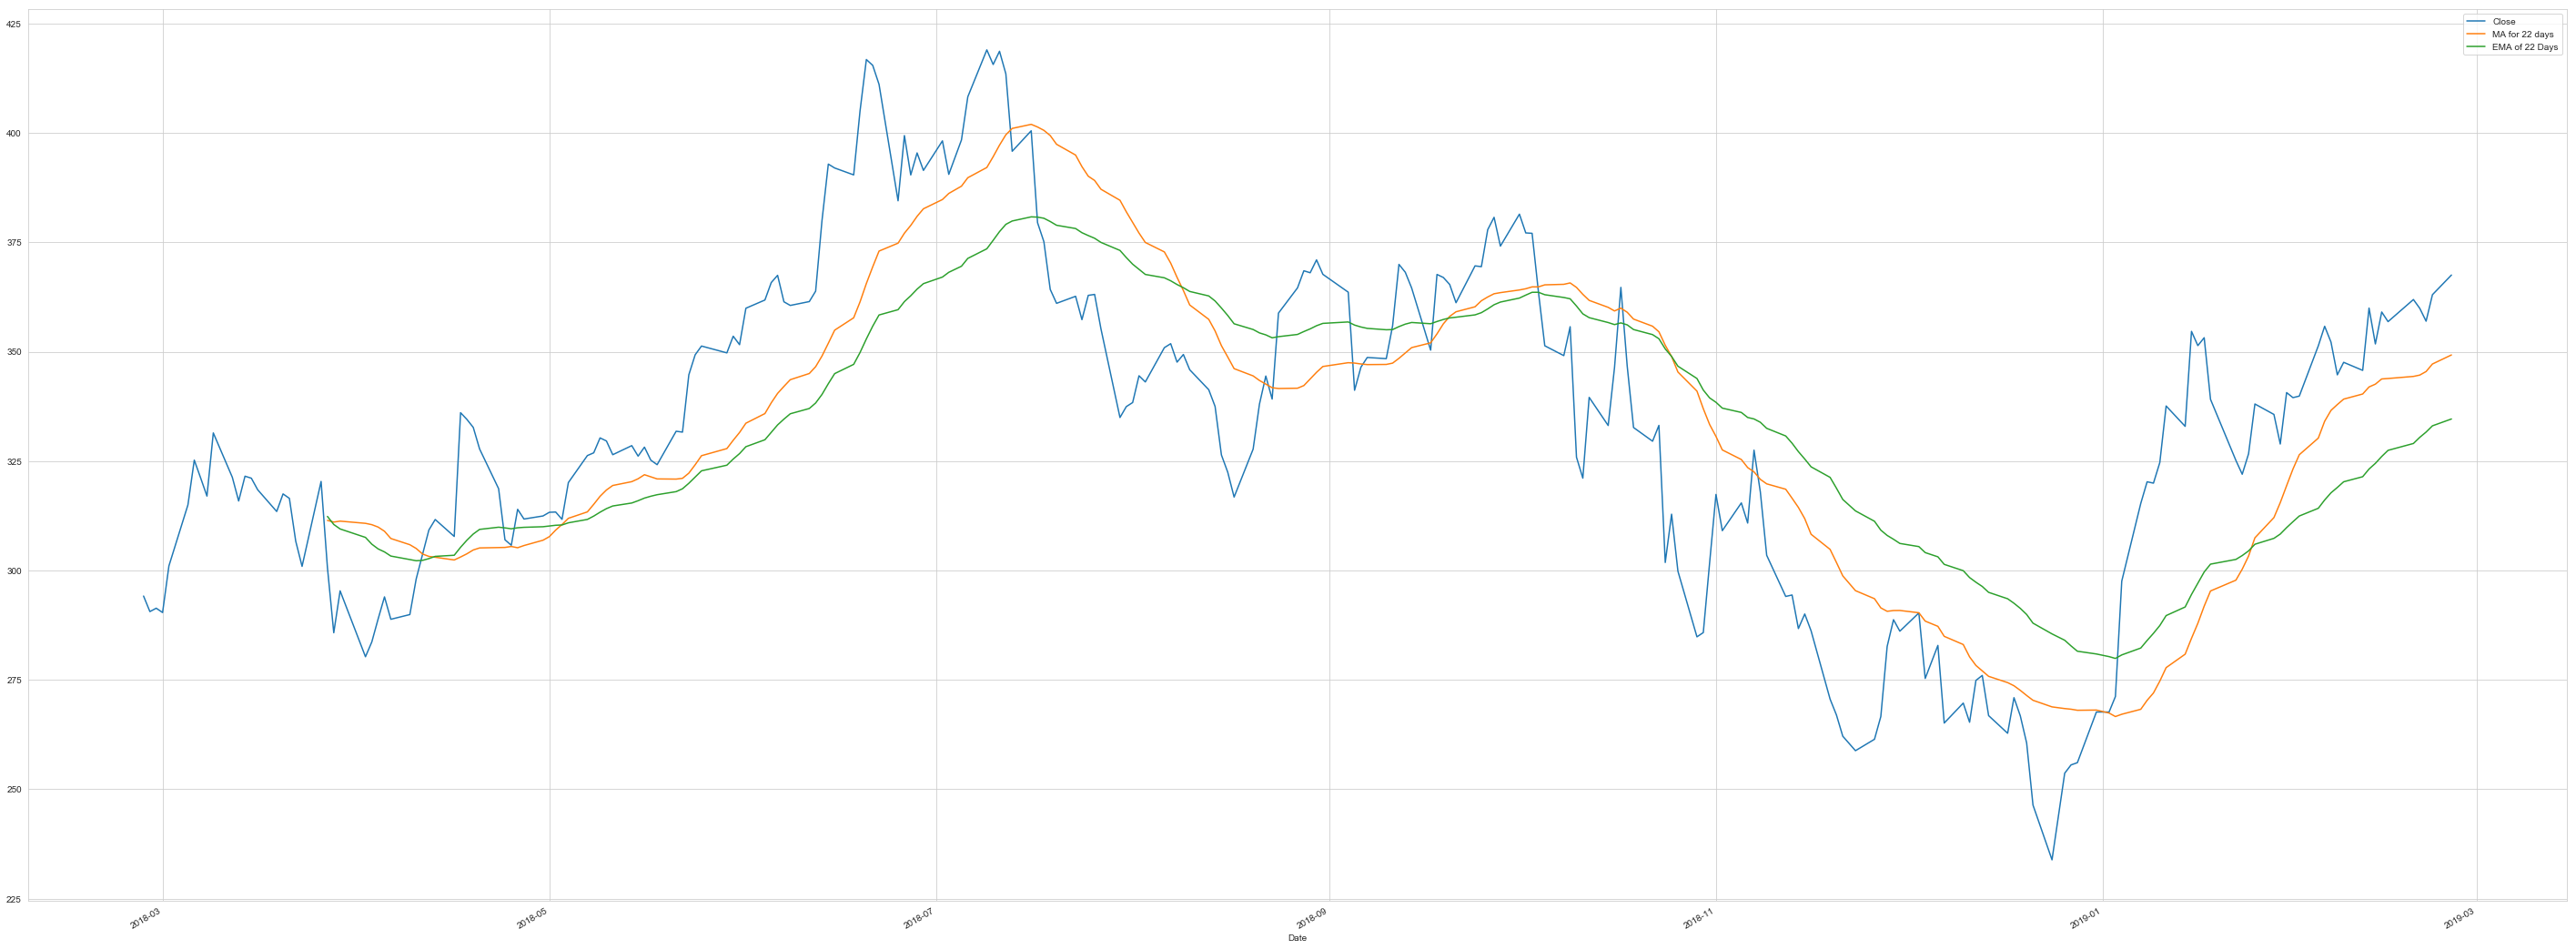

In [8]:
#2 Exponential Moving Average (EMA)
emaPeriod = 22
NFLX['EMA of 22 Days'] = NFLX['Close'].ewm(com=emaPeriod -1,min_periods =emaPeriod).mean()
NFLX[['Close','MA for 22 days','EMA of 22 Days']].plot(subplots=False,figsize=(50,20))

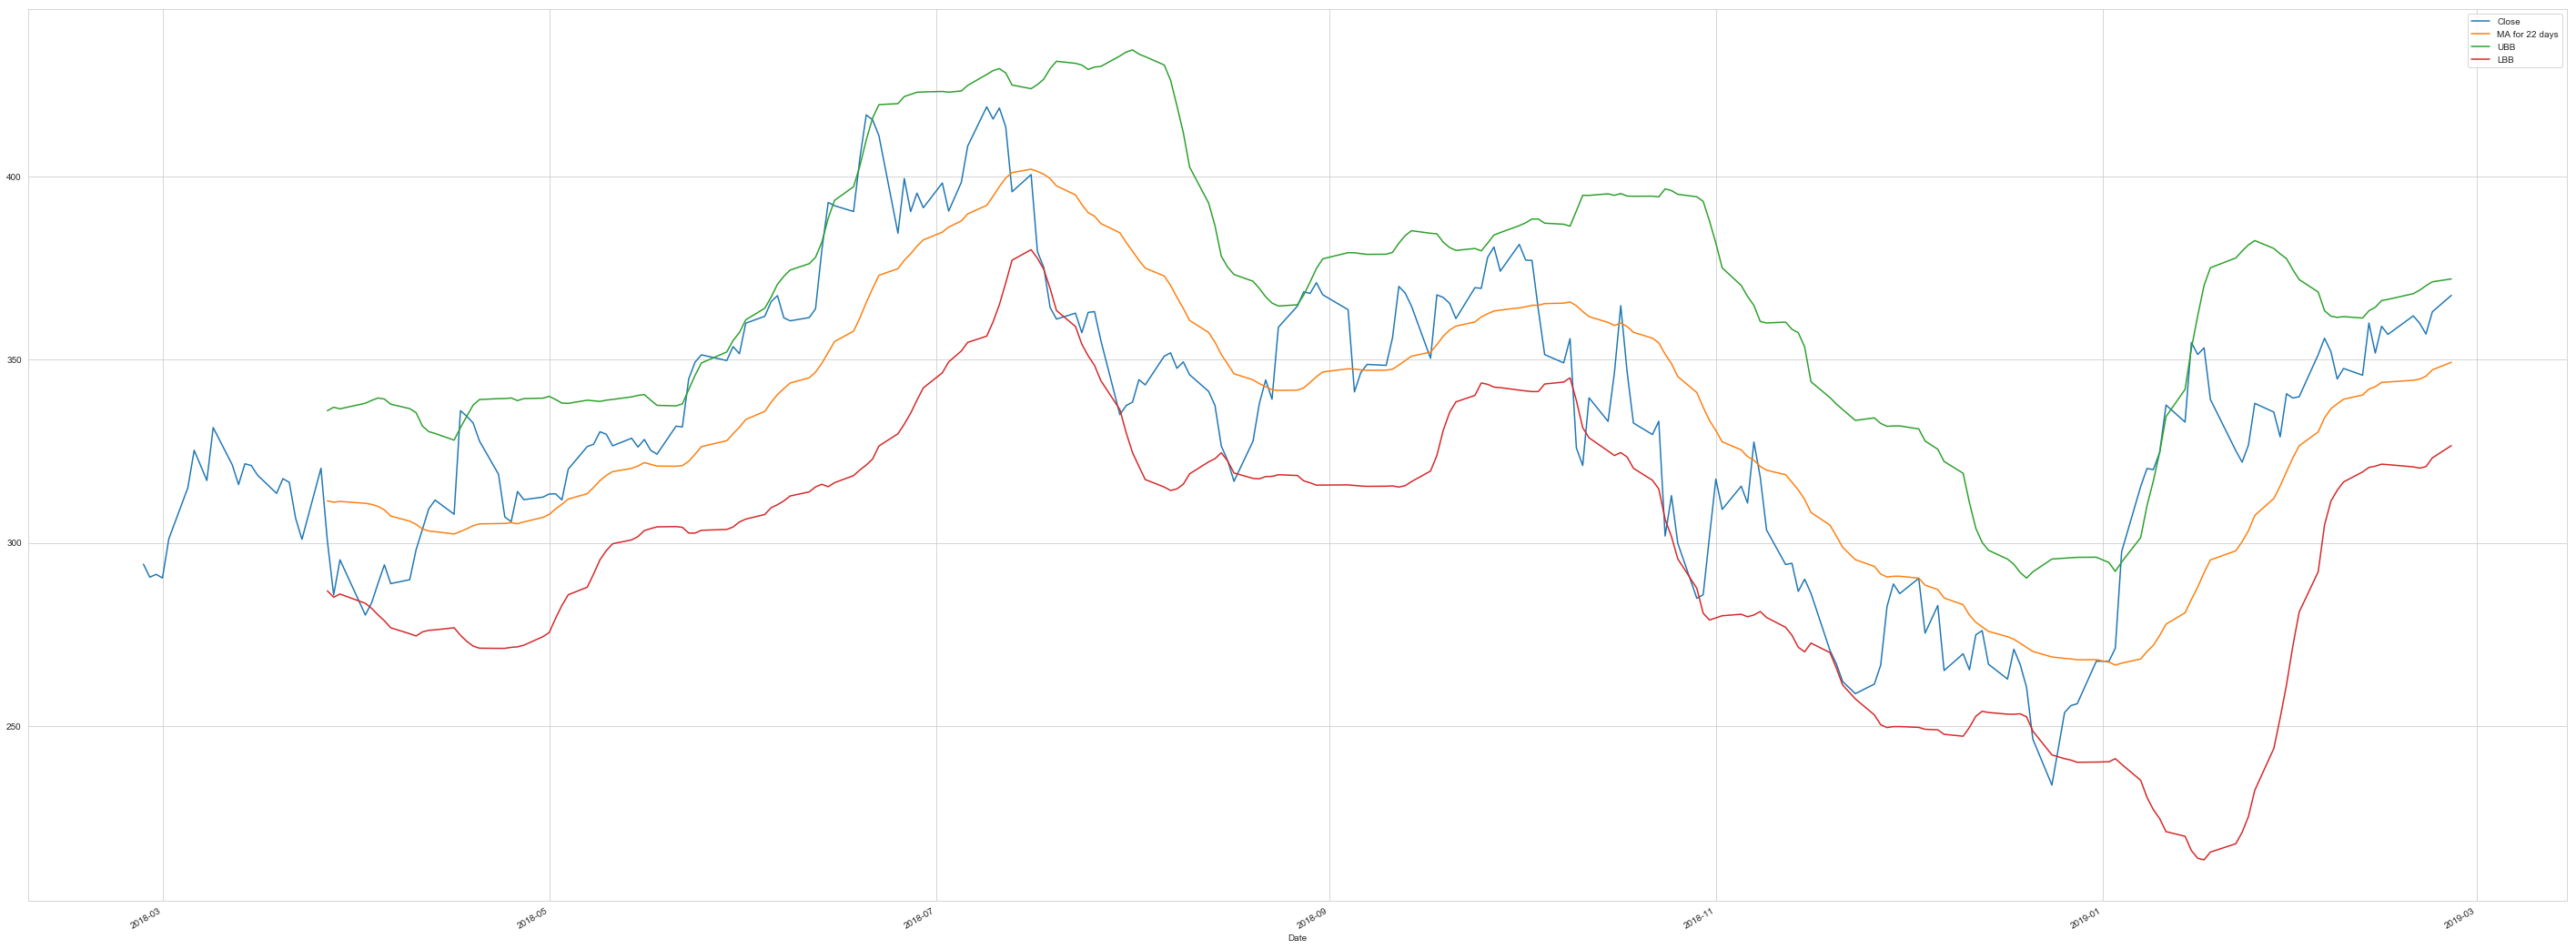

In [9]:
#3 Bollinger Bands (BB)
SD = NFLX['Close'].rolling(22).std()
NFLX['UBB'] = NFLX['MA for 22 days'] + (2*SD)
NFLX['LBB'] = NFLX['MA for 22 days'] - (2*SD)
NFLX[['Close','MA for 22 days','UBB','LBB']].plot(subplots=False,figsize=(50,20))

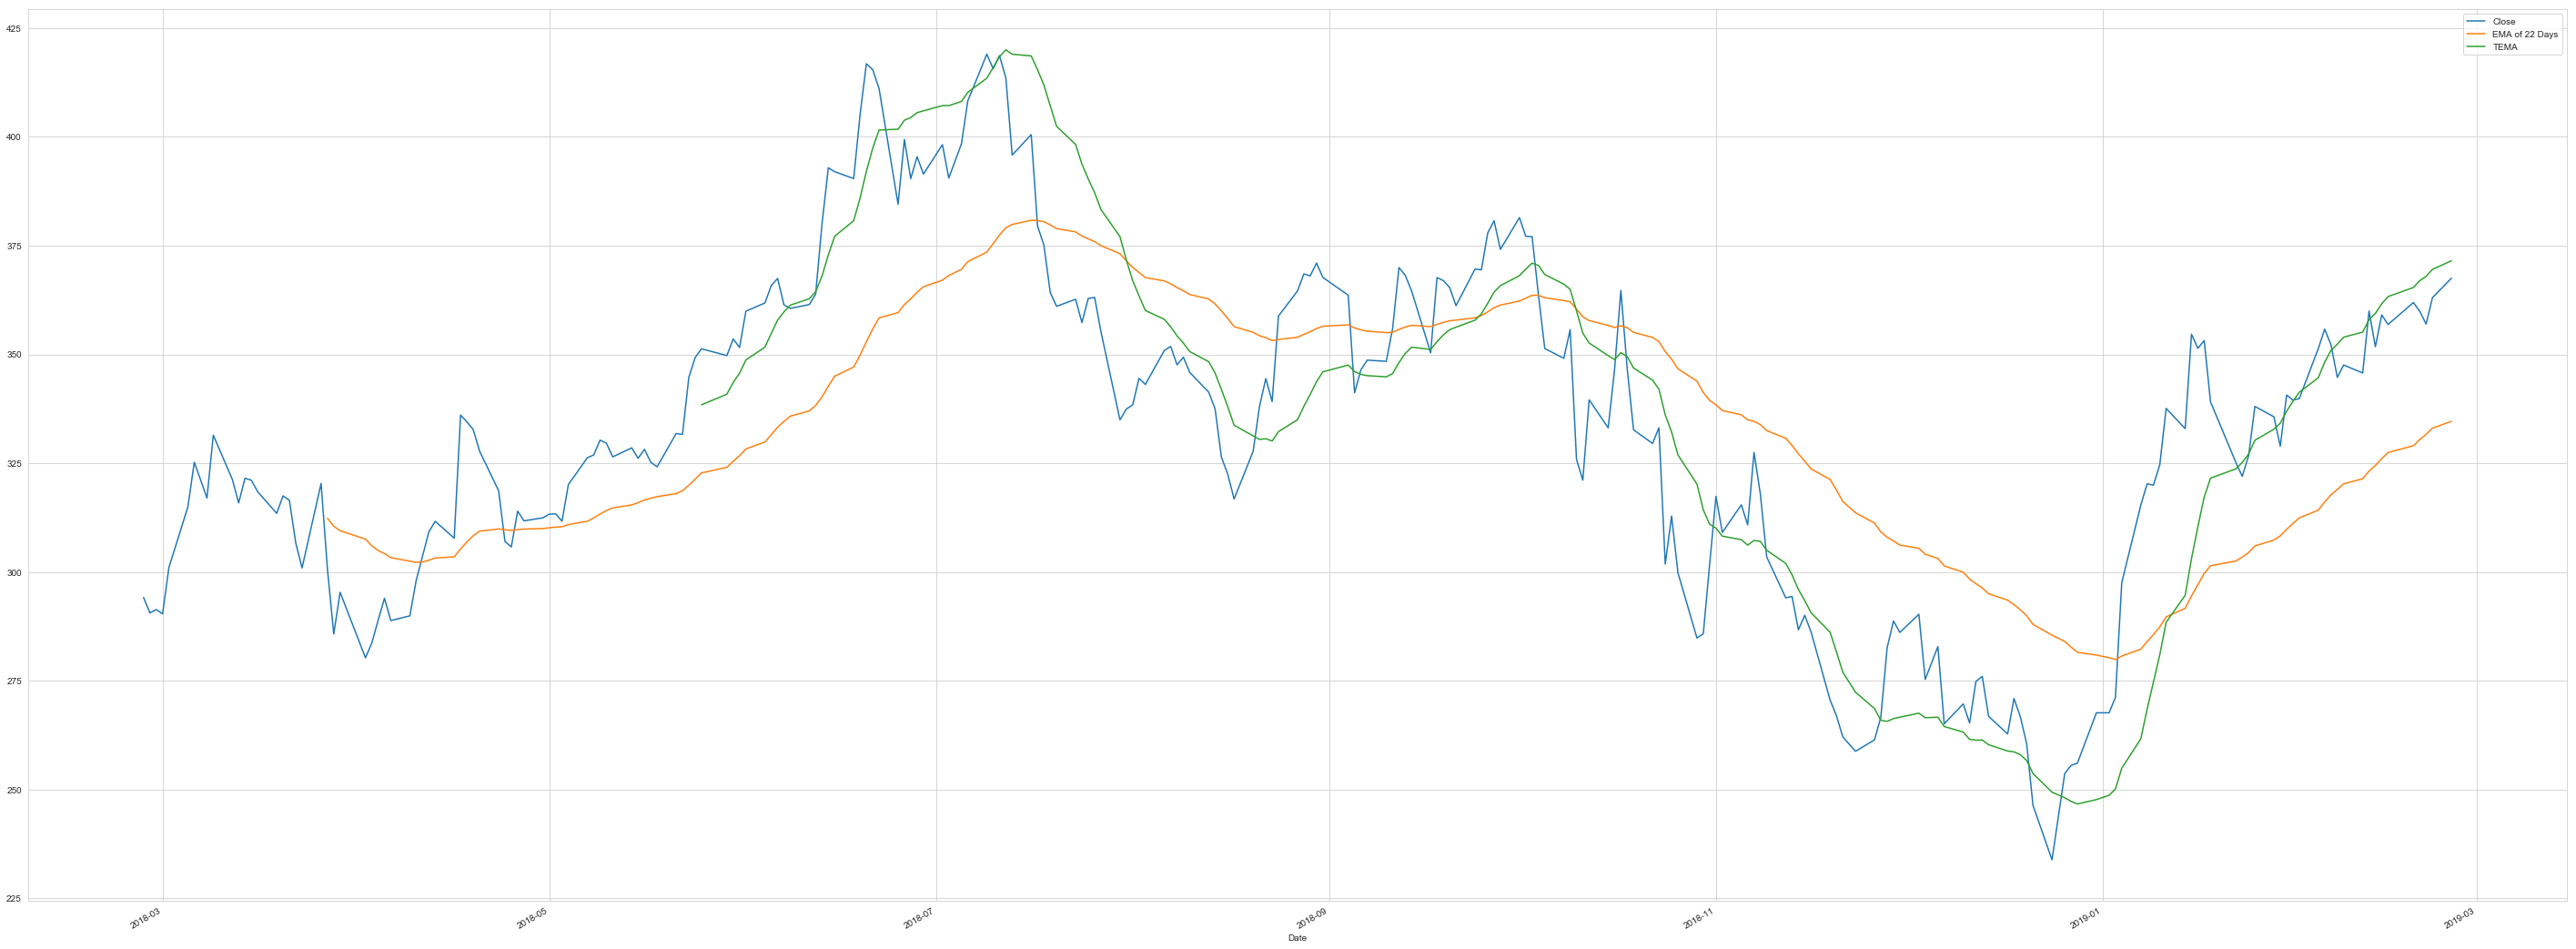

In [10]:
#4 Triple Exponential Moving Average (TEMA)
NFLX['EMA2'] = NFLX['EMA of 22 Days'].ewm(com=emaPeriod -1,min_periods =emaPeriod).mean()
NFLX['EMA3'] = NFLX['EMA2'].ewm(com=emaPeriod -1,min_periods =emaPeriod).mean()
NFLX['TEMA'] = 3*NFLX['EMA of 22 Days'] - 3*NFLX['EMA2'] + NFLX['EMA3']
NFLX[['Close','EMA of 22 Days','TEMA']].plot(subplots=False,figsize=(50,20))

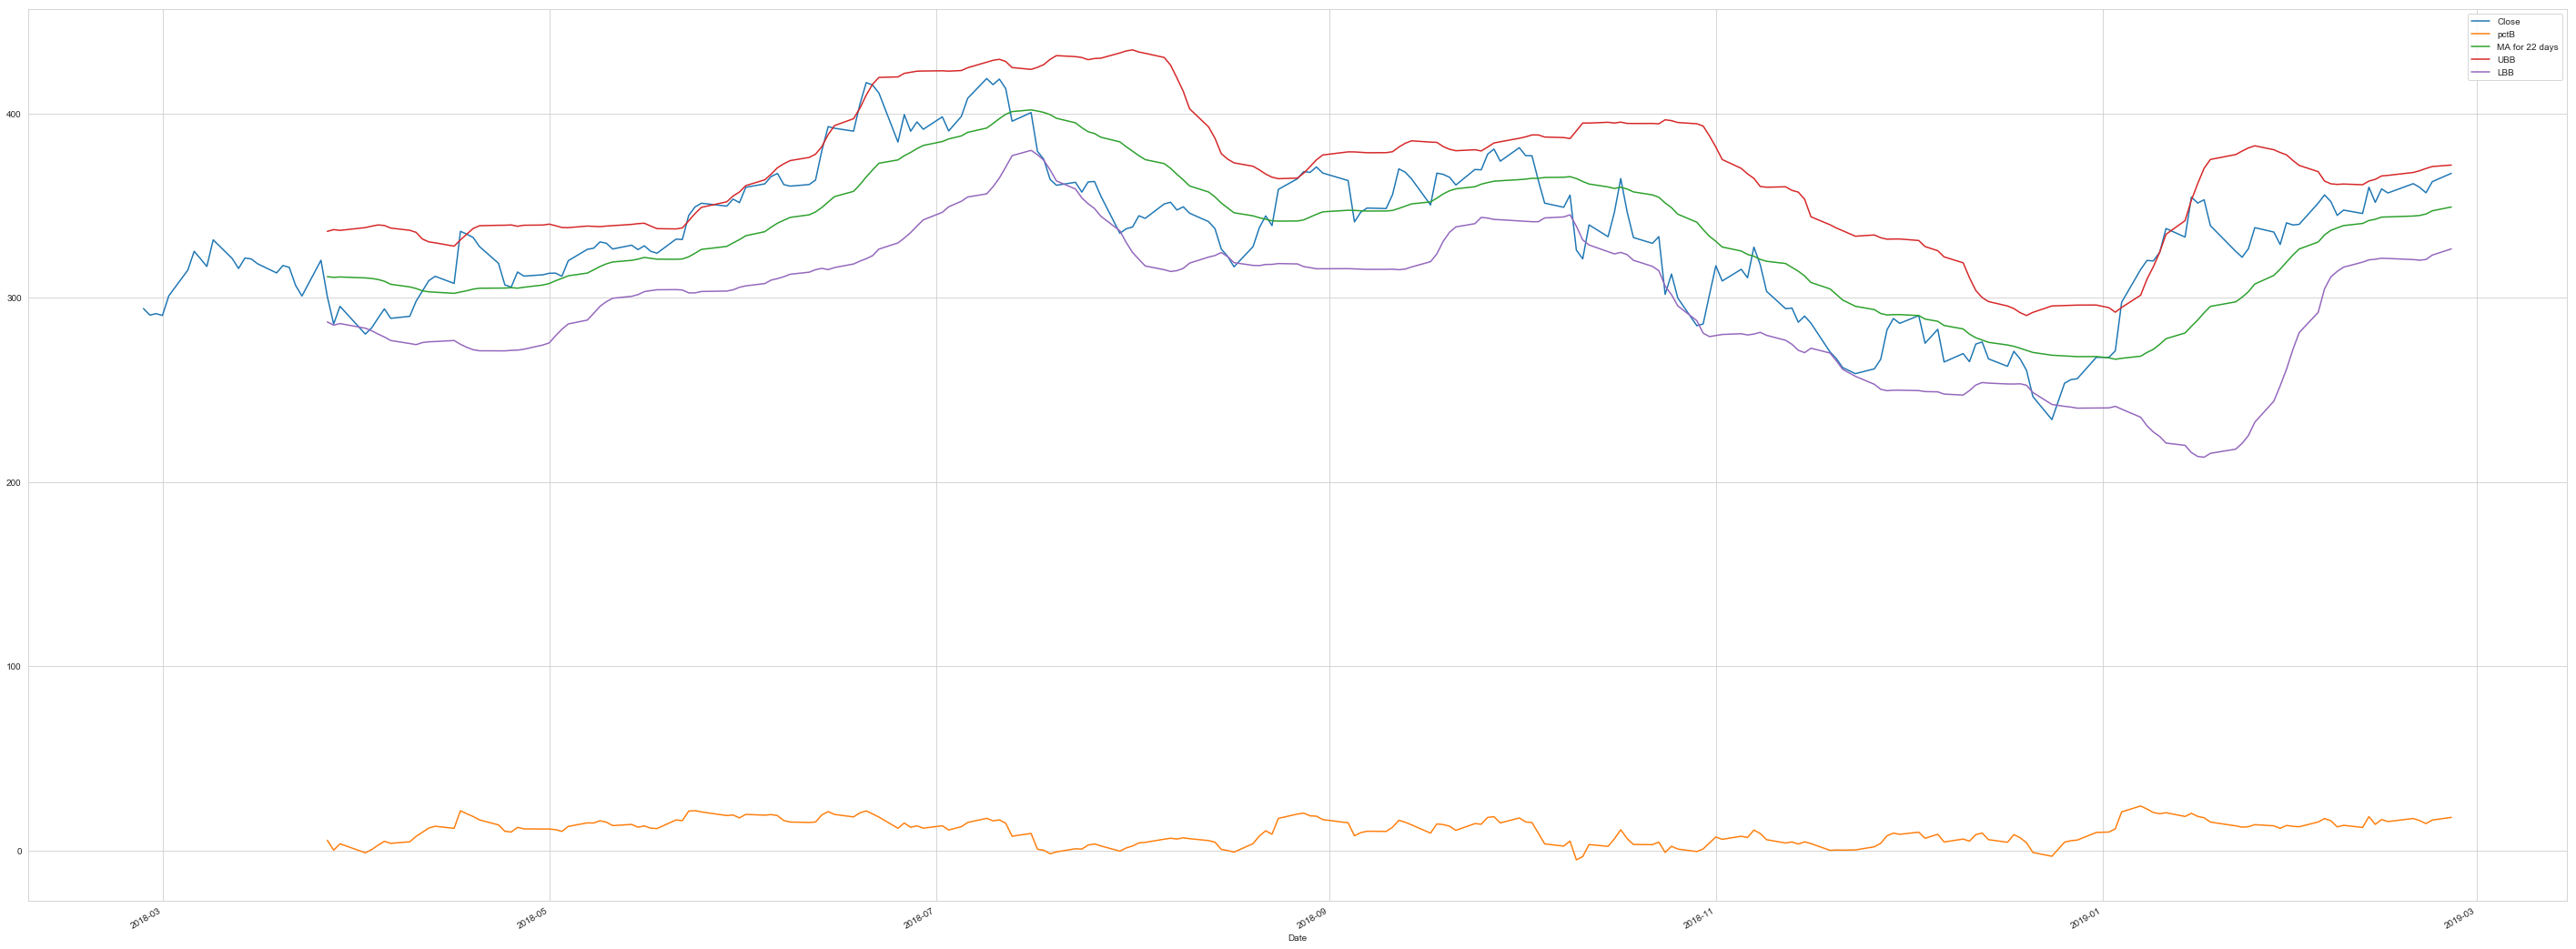

In [11]:
#5 %b
NFLX['pctB'] = 20 * (NFLX['Close'] - NFLX['LBB']) / (NFLX['UBB'] - NFLX['LBB'])
NFLX[['Close','pctB','MA for 22 days','UBB','LBB']].plot(subplots=False,figsize=(50,20))

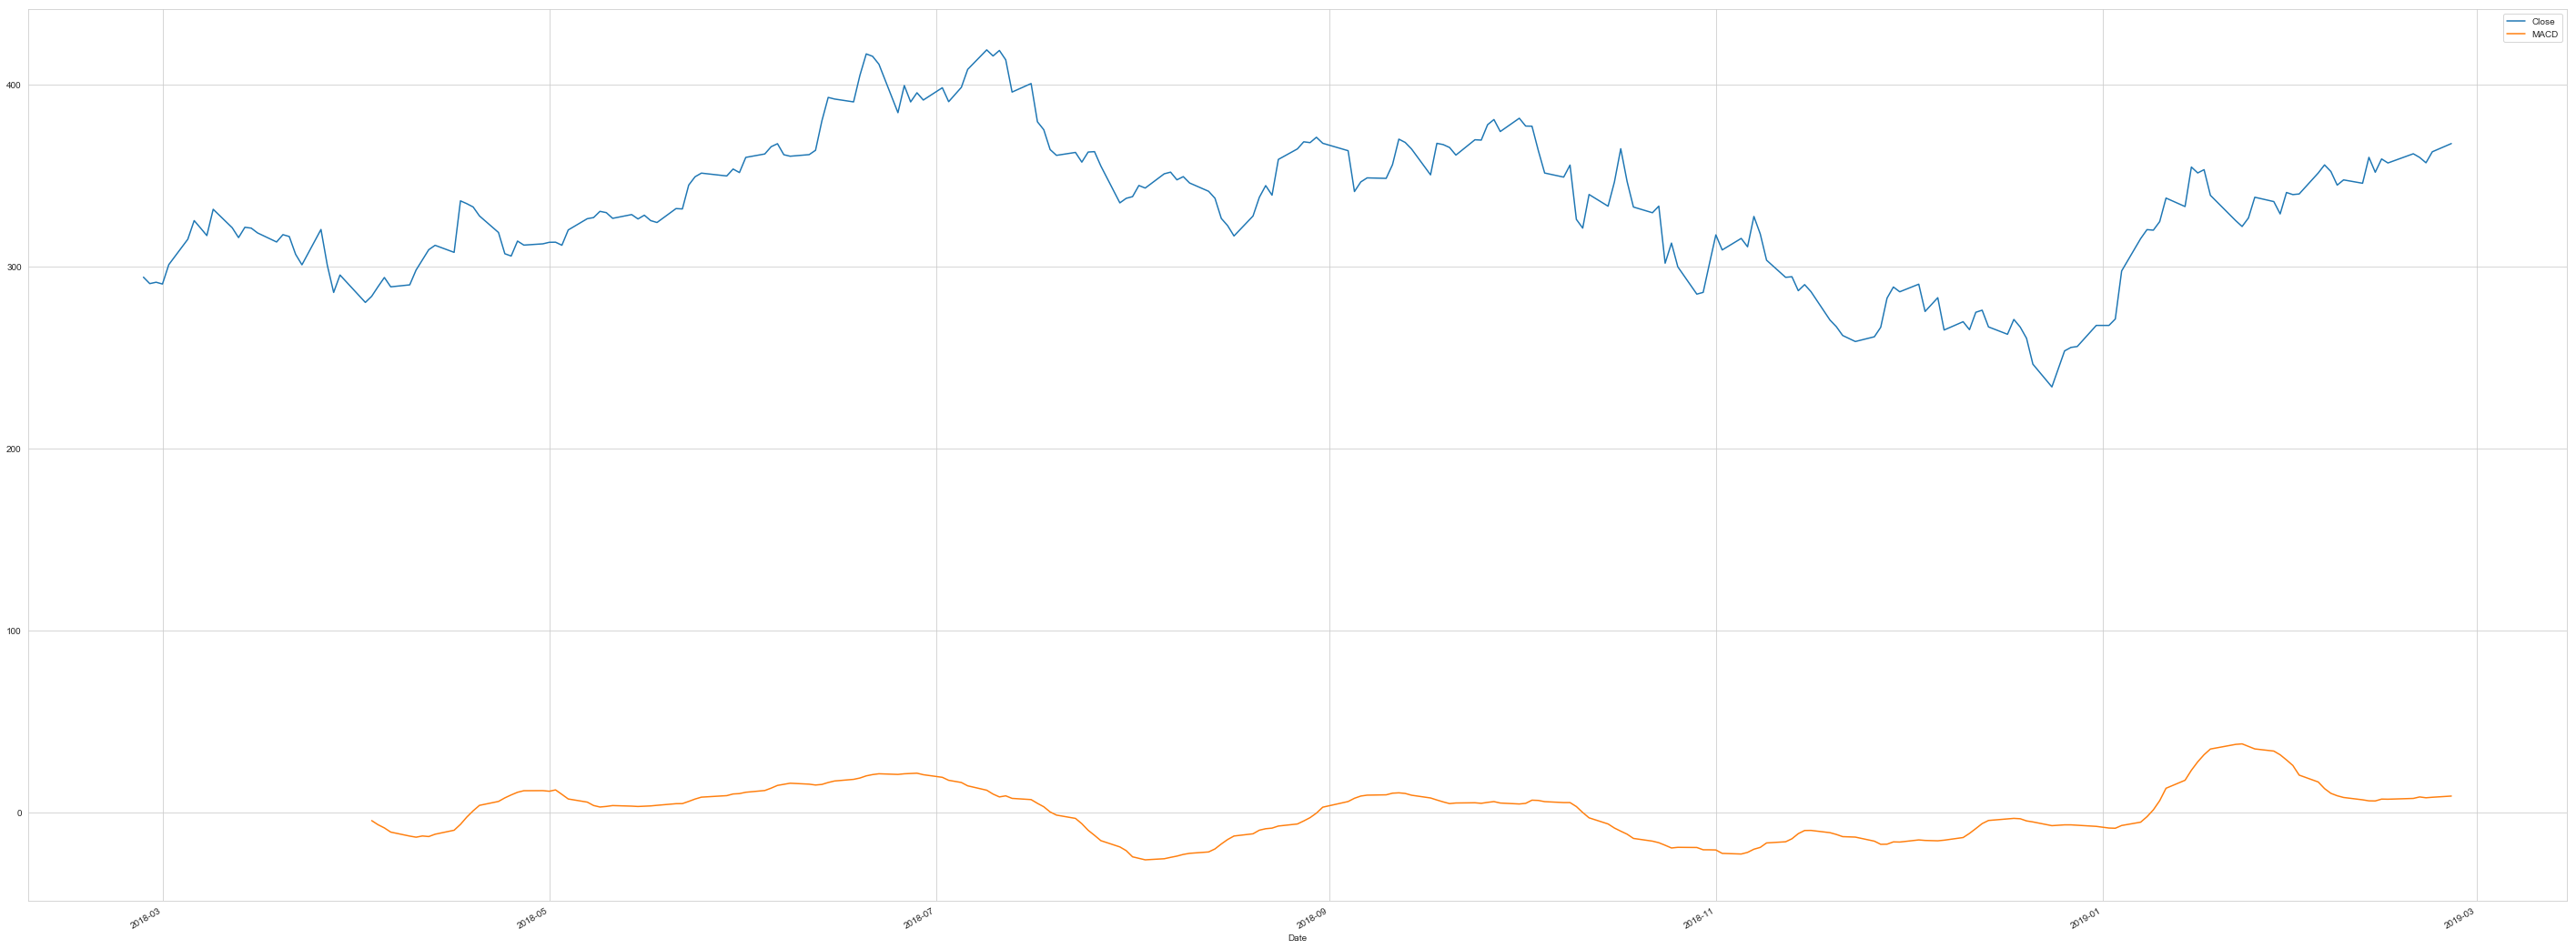

In [12]:
#6 Moving Average Convergence/Divergence (MACD)
MA12 = NFLX['Close'].rolling(12).mean()
MA26 = NFLX['Close'].rolling(26).mean()
MACD = MA12 - MA26
NFLX['MACD'] = MACD
NFLX[['Close','MACD']].plot(subplots=False,figsize=(50,20))

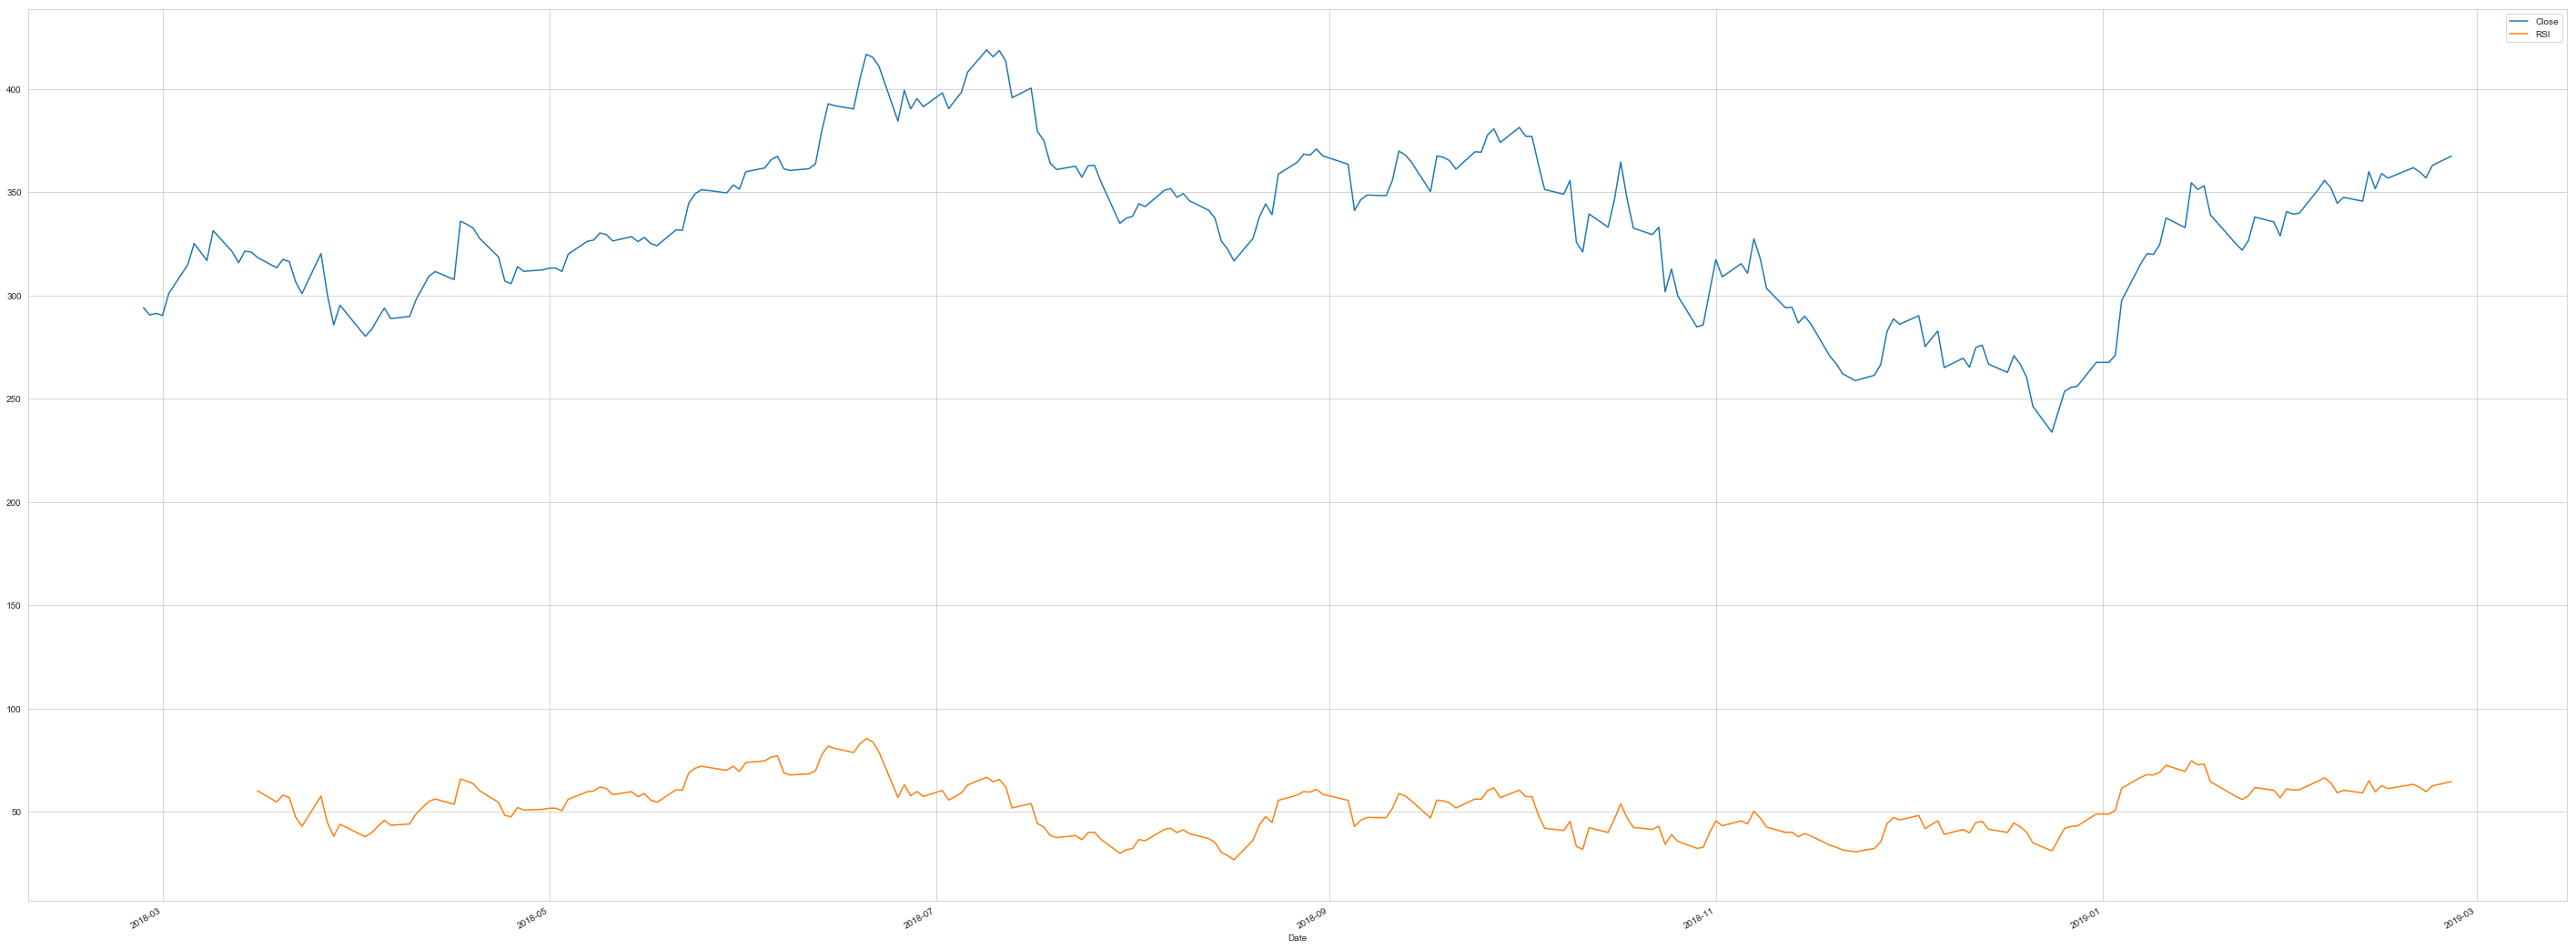

In [13]:
#7 Relative Strength Index (RSI)
rsiVal=14
diffrence = NFLX['Close'].diff()
gain = diffrence.mask(diffrence < 0, 0) 
loss = diffrence.mask(diffrence > 0, 0) 
avgGain = gain.ewm(com=rsiVal-1 ,min_periods=rsiVal).mean()
avgLoss = loss.ewm(com=rsiVal-1 ,min_periods=rsiVal).mean()
rs = abs(avgGain/avgLoss)
rsi = 100*(rs/(1+rs))
NFLX['RSI'] = rsi
NFLX[['Close','RSI']].plot(subplots=False,figsize=(50,20))

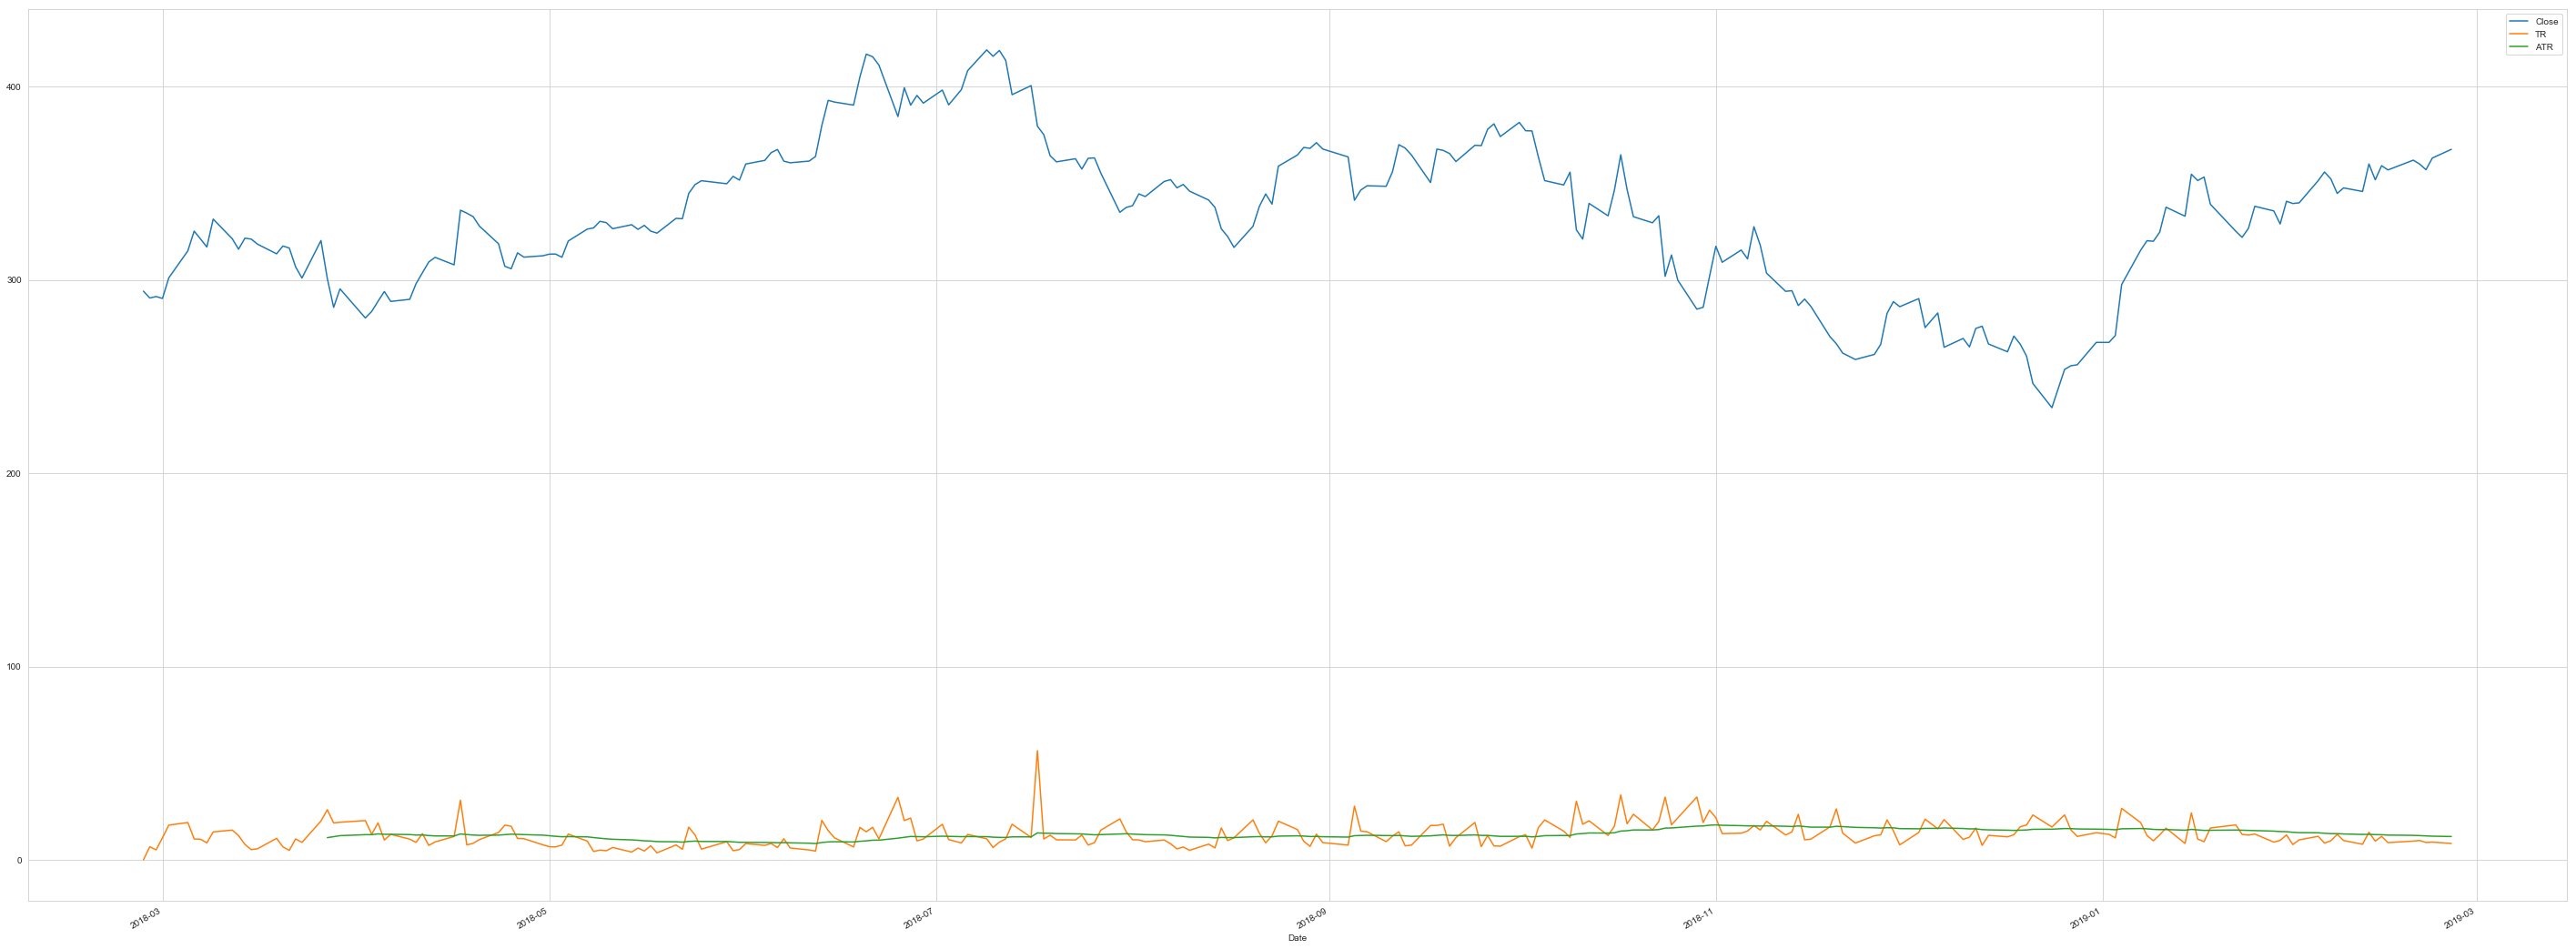

In [14]:
#8 Average True Range (ATR) : measure of Volitality
def TRange(h,l,yc):
    x=h-l
    y=abs(h-yc)
    z=abs(l-yc)
    if y <= x >= z:
        TR = x
    elif x <= y >=z:
        TR = y
    elif x <= z >=y:
        TR = z
    return TR
x=1
TrueRange = []
TrueRange.append(0)
while x < len(NFLX['Close']):
    TR = TRange(NFLX['High'][x],NFLX['Low'][x],NFLX['Close'][x-1])
    TrueRange.append(TR)
    x = x+1
NFLX['TR'] = TrueRange
NFLX['ATR'] = NFLX['TR'].ewm(com=emaPeriod -1,min_periods =emaPeriod).mean()
NFLX[['Close','TR','ATR']].plot(subplots=False,figsize=(50,20))

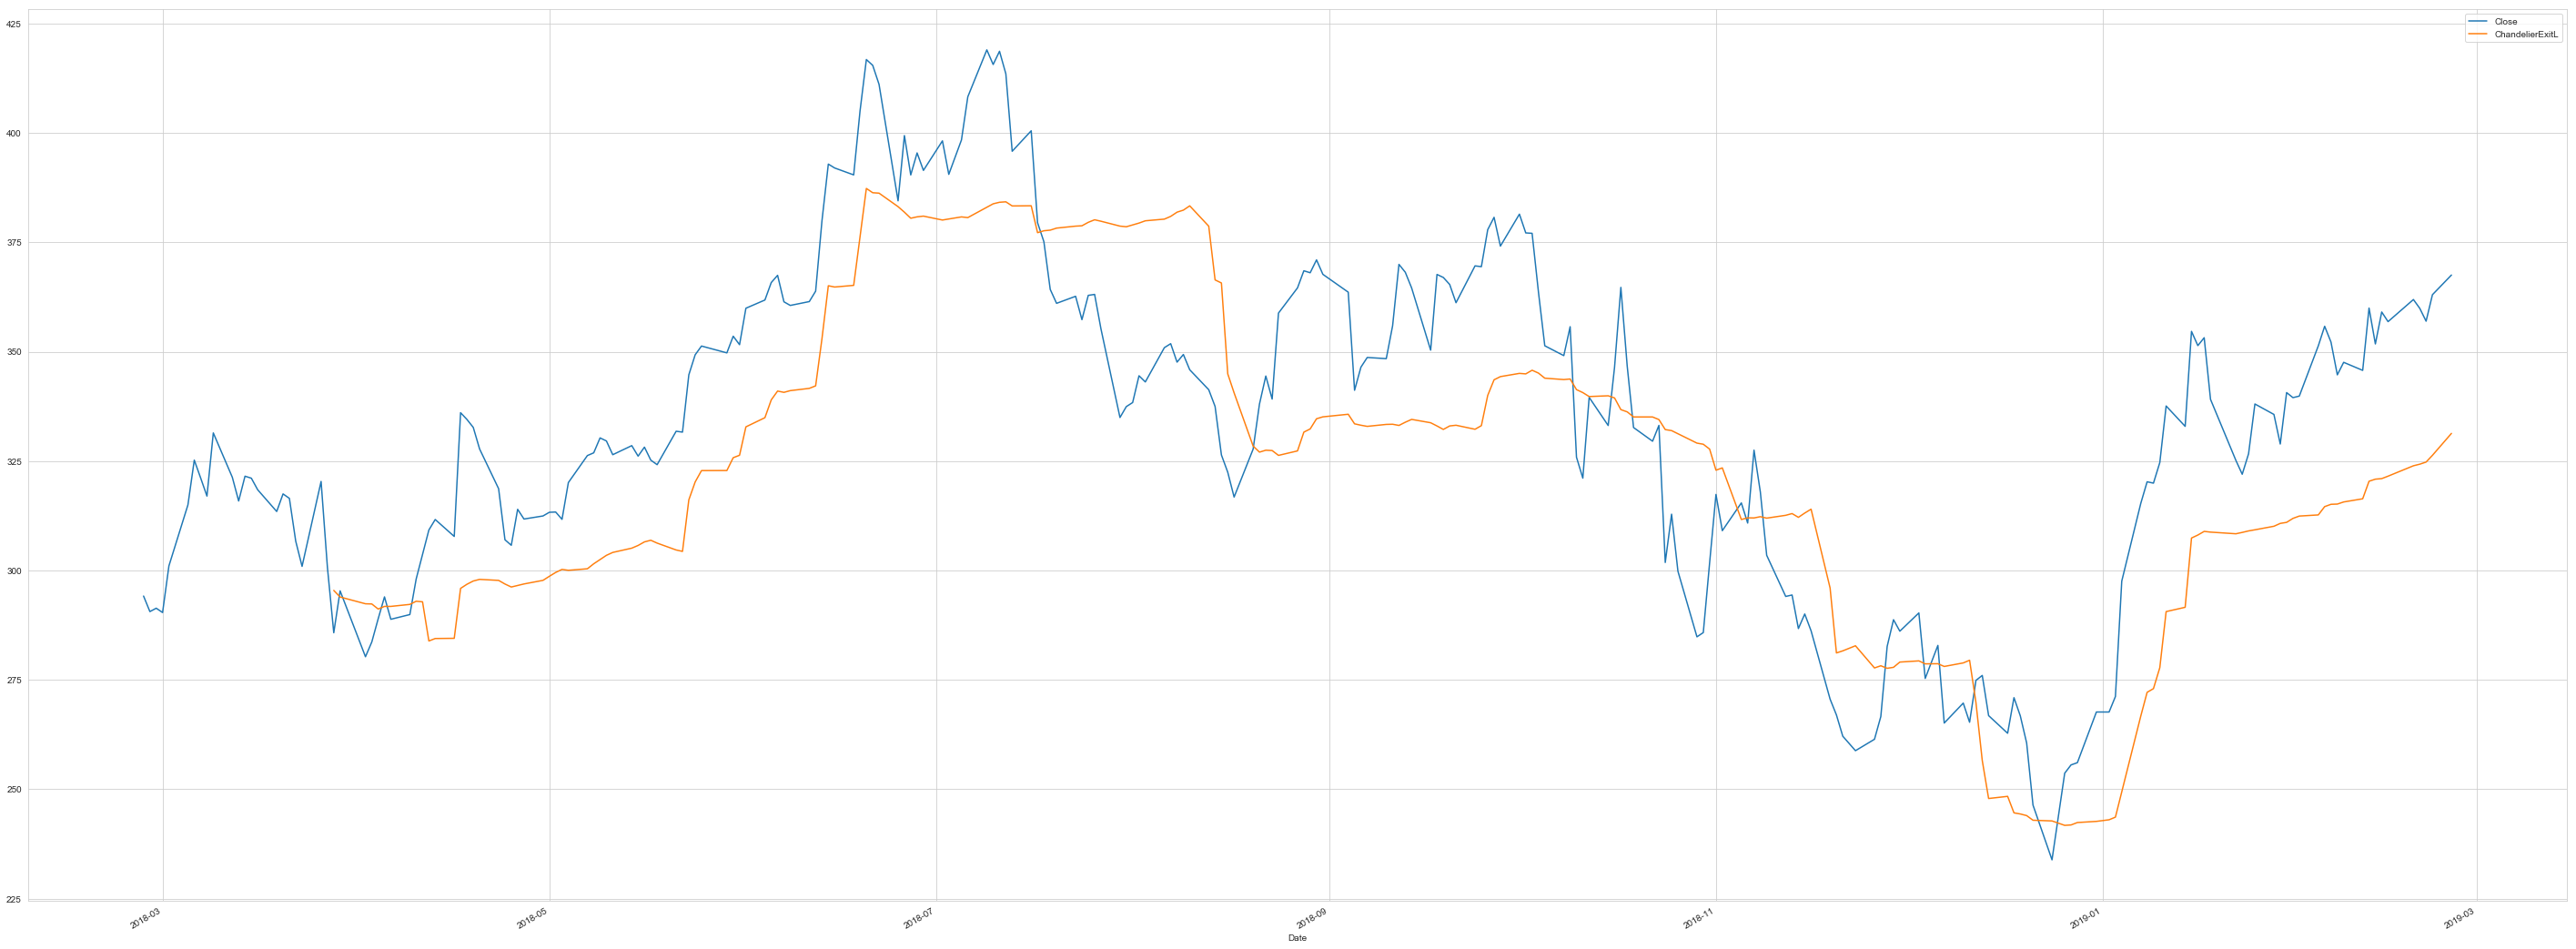

In [15]:
#9  Chandelier Exit 
def Highest(n,emaPeriod):
    max=NFLX['Close'][n]
    for i in range(n,n+emaPeriod+1):
        if NFLX['Close'][i] > max:
            max = NFLX['Close'][i]
    return max
fac =3
ChandelierExitL=np.array([])
ChandelierExitL = np.append(ChandelierExitL, [np.nan]*emaPeriod)
for i in range(0,len(NFLX['Close'])-emaPeriod):
    ChandelierExit = Highest(i,emaPeriod) - fac*NFLX['ATR'][i+emaPeriod]
    ChandelierExitL = np.append(ChandelierExitL,ChandelierExit)
NFLX['ChandelierExitL']=ChandelierExitL
NFLX[['Close','ChandelierExitL']].plot(subplots=False,figsize=(50,20))

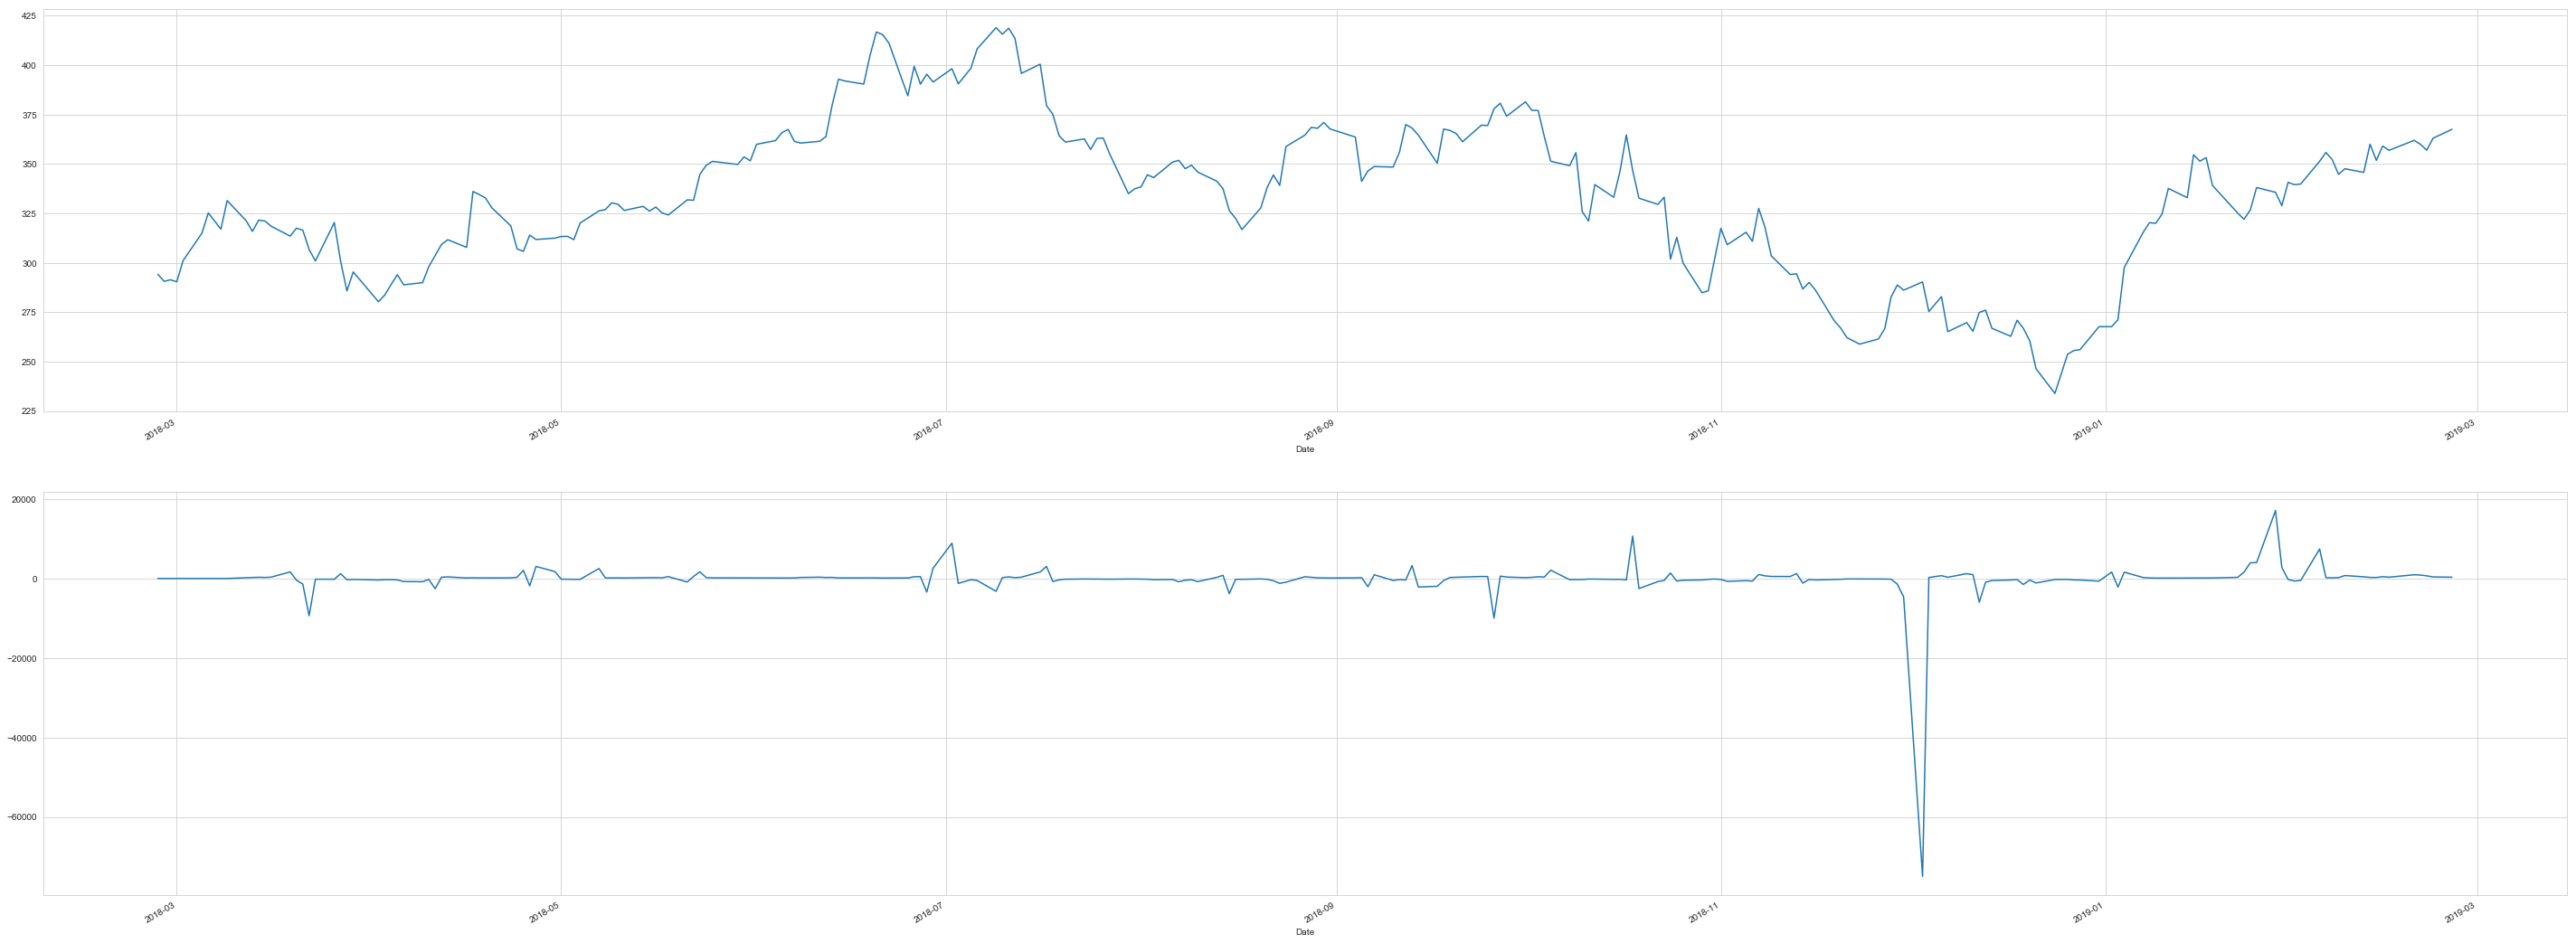

In [16]:
#10 Chande Momentum Oscillator (MOM)
def cmo(timeFrame):
    x=timeFrame
    CMO = []
    for i in range(0,timeFrame):
        CMO.append(0);
    NFLX['Diff'] = NFLX['Close'].diff()
    while x < len(NFLX['Close']):
        upSum=0
        downSum=0
        y=x-timeFrame+1
        while y<x:
            if NFLX['Diff'][y]>=0:
                upSum += NFLX['Diff'][y]
            else:
                downSum += NFLX['Diff'][y]
            y+=1
        curCMO = ((upSum-downSum)/(upSum+float(downSum)))*100
        CMO.append(curCMO)
        x+=1
    NFLX['CMO'] = CMO
    return
cmo(10)
plt.figure()
plt.subplot(2,1,1)
NFLX['Close'].plot(subplots=False,figsize=(50,20))
plt.subplot(2,1,2)
NFLX['CMO'].plot(subplots=False,figsize=(50,20))

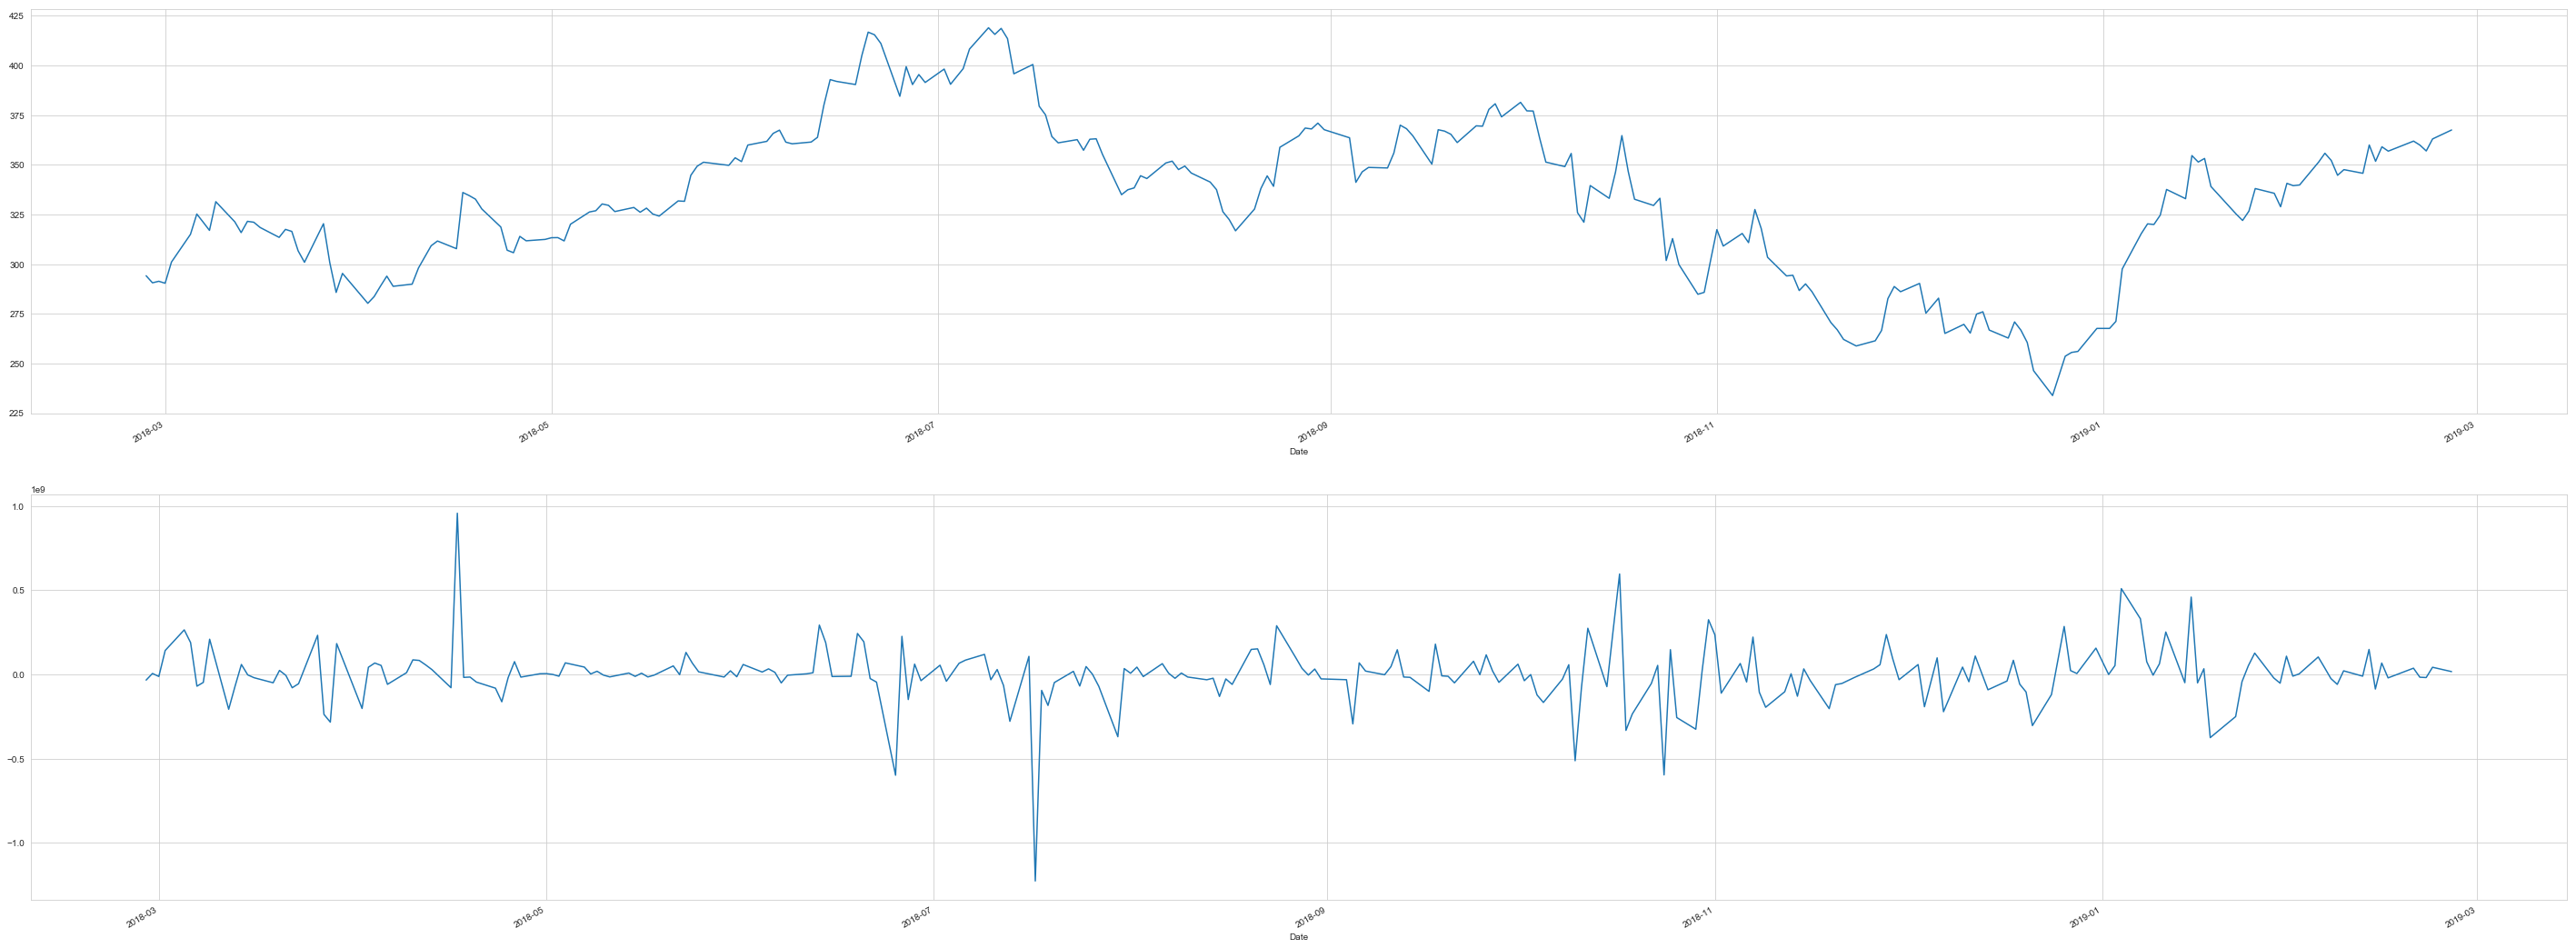

In [17]:
#11 Force Index (FI)
FI = np.array([])
FI = np.append(FI, np.nan)
for i in range(1,len(NFLX['Close'])):
    FIVal = (NFLX['Close'][i] - NFLX['Close'][i-1])*NFLX['Volume'][i]
    FI = np.append(FI,FIVal)
NFLX['FI']=FI
plt.figure()
plt.subplot(2,1,1)
NFLX['Close'].plot(subplots=False,figsize=(50,20))
plt.subplot(2,1,2)
NFLX['FI'].plot(subplots=False,figsize=(50,20))

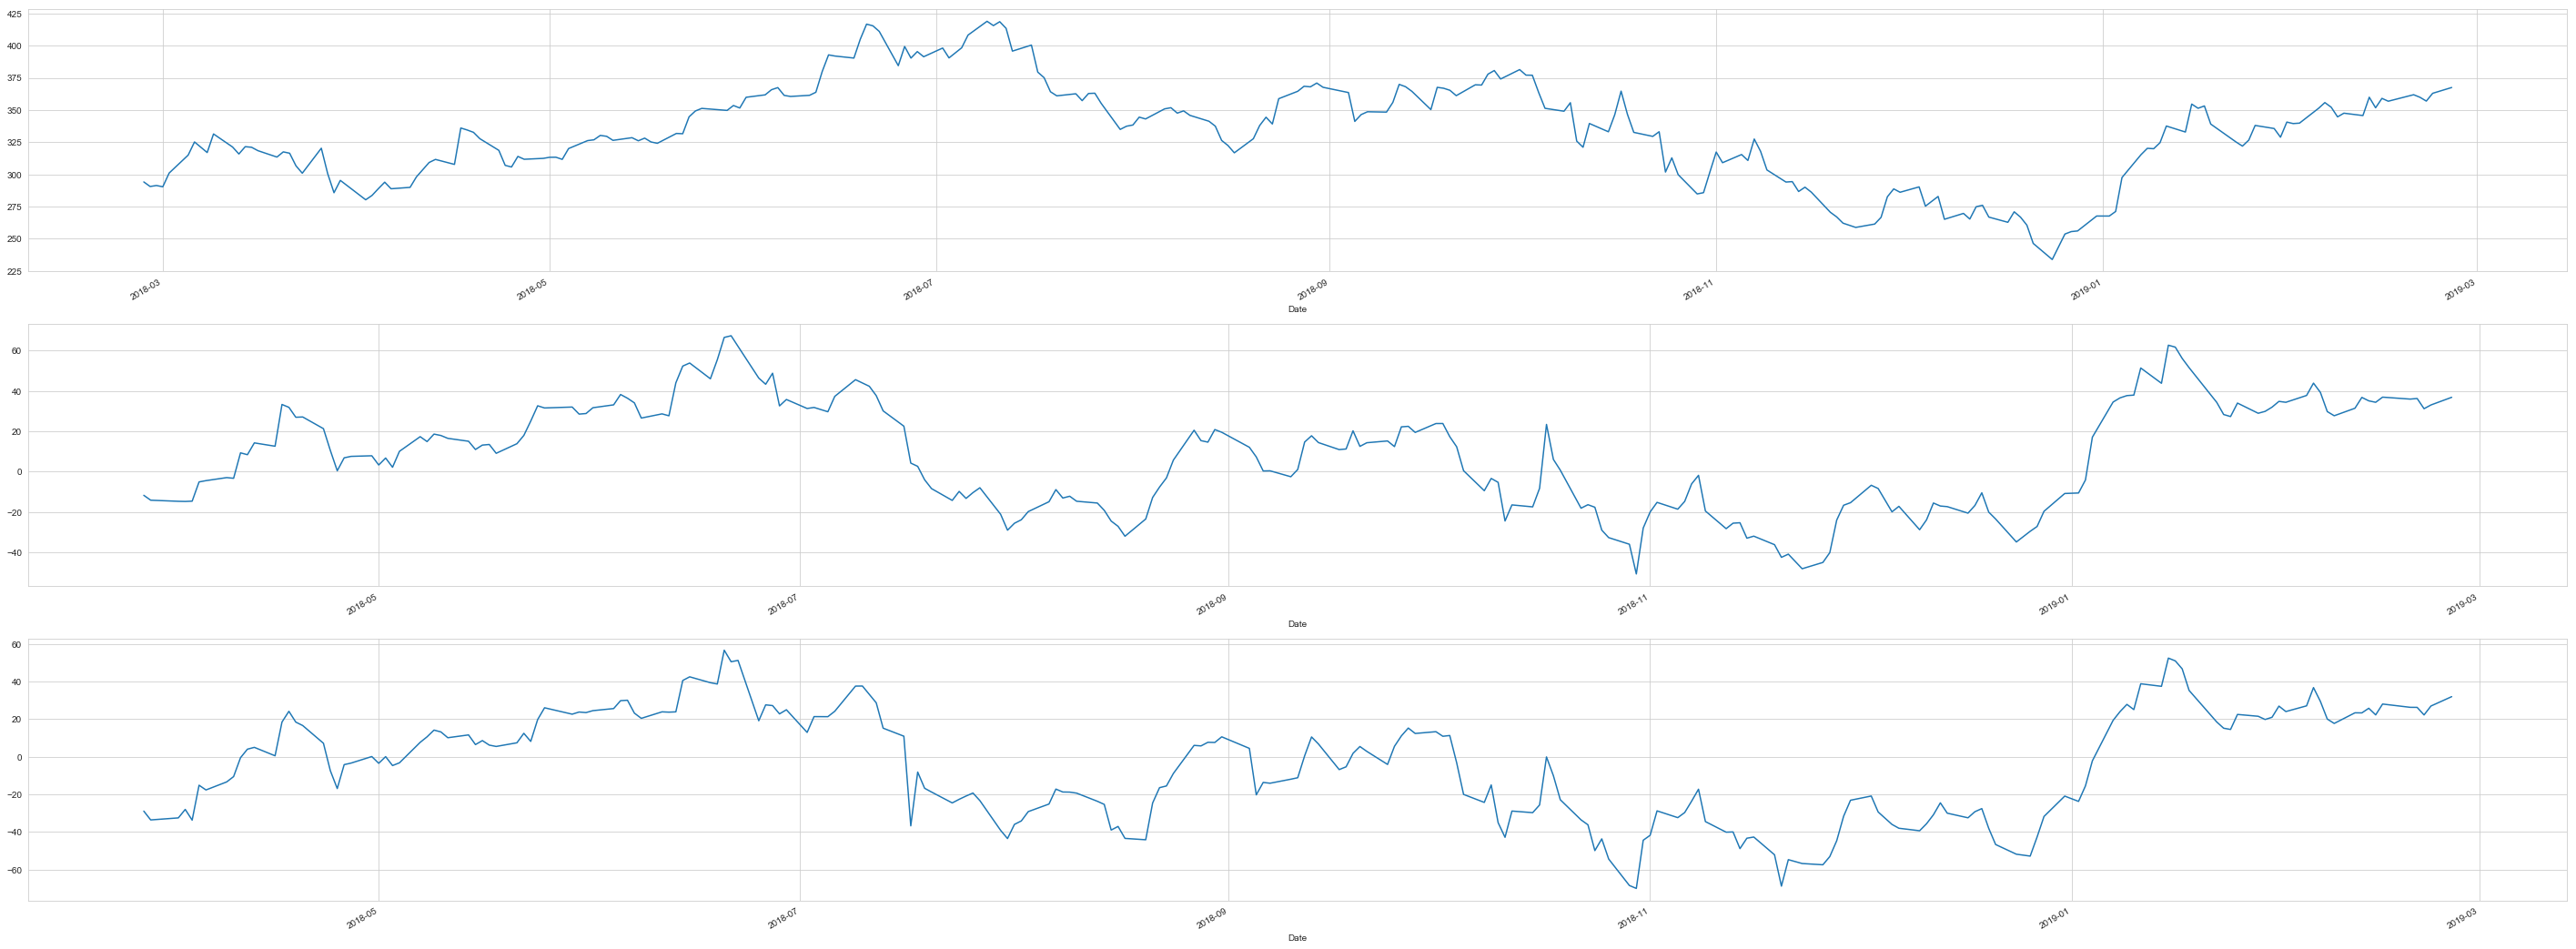

In [18]:
#12 Elder-ray
BullPower = np.array([])
BullPower = np.append(BullPower, [np.nan]*emaPeriod)
BearPower = np.array([])
BearPower = np.append(BearPower, [np.nan]*emaPeriod)
for i in range(emaPeriod,len(NFLX['Close'])):
    BullP = NFLX['High'][i] - NFLX['EMA of 22 Days'][i]
    BullPower = np.append(BullPower,BullP)
    BearP = NFLX['Low'][i] - NFLX['EMA of 22 Days'][i]
    BearPower = np.append(BearPower,BearP)
NFLX['BullPower'] = BullPower
NFLX['BearPower'] = BearPower
plt.figure()
plt.subplot(3,1,1)
NFLX['Close'].plot(subplots=False,figsize=(50,20))
plt.subplot(3,1,2)
NFLX['BullPower'].plot(subplots=False,figsize=(50,20))
plt.subplot(3,1,3)
NFLX['BearPower'].plot(subplots=False,figsize=(50,20))

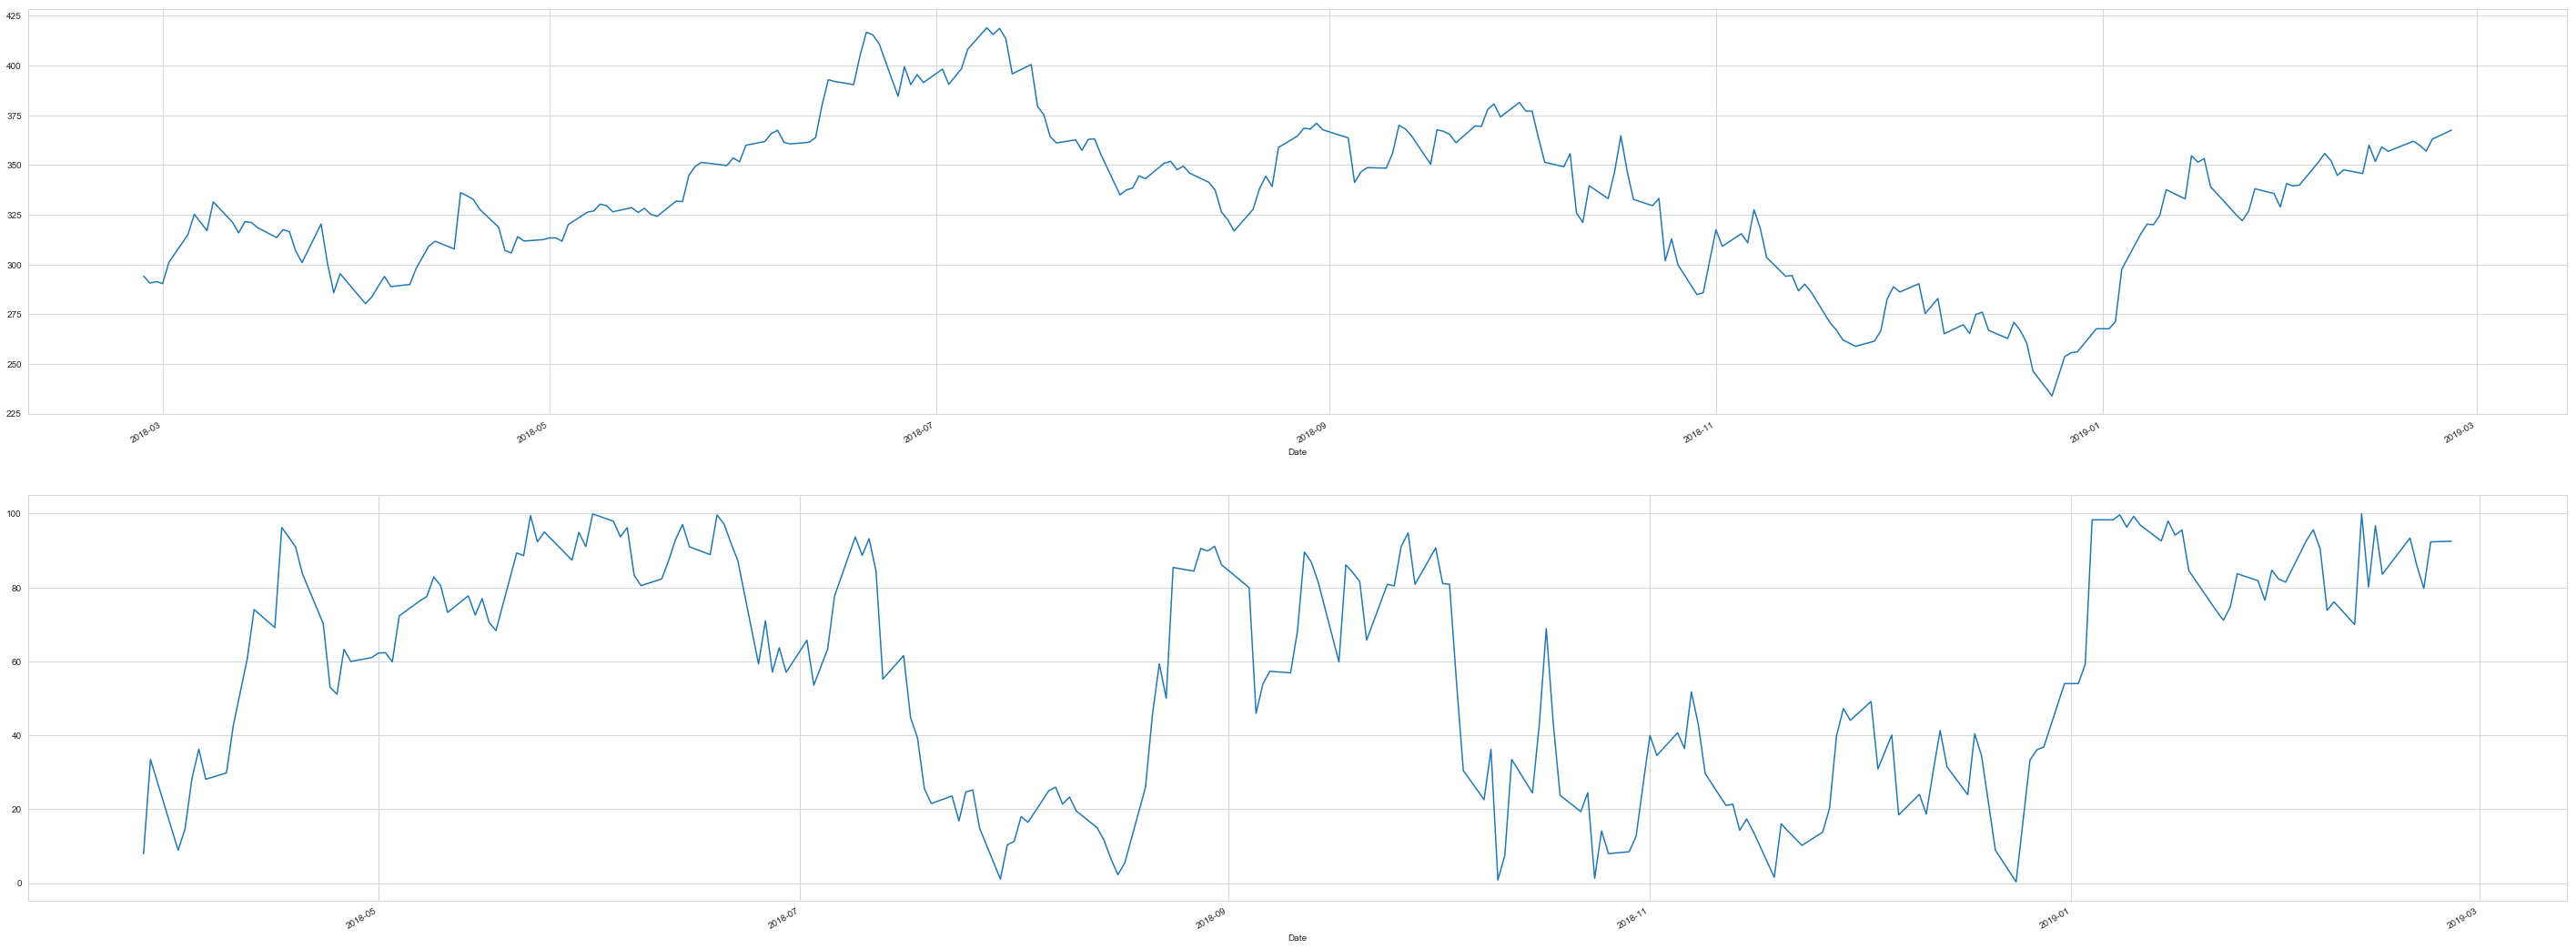

In [19]:
#13 Stochastic %k (STCK)
def HighestLowest(n,period):
    high=NFLX['High'][n]
    low=NFLX['Low'][n]
    for i in range(n,n+period+1):
        if NFLX['High'][i] > high:
            high = NFLX['High'][i]
        if NFLX['Low'][i] < low:
            low = NFLX['Low'][i]
    return high,low
STCK = np.array([])
STCK = np.append(STCK, [np.nan]*emaPeriod)
for i in range(0,len(NFLX['Close'])-emaPeriod):
    high,low=HighestLowest(i,emaPeriod)
    PK = 100*(NFLX['Close'][i+emaPeriod] - low)/(high - low)
    STCK = np.append(STCK, PK)
NFLX['STCK'] = STCK
plt.figure()
plt.subplot(2,1,1)
NFLX['Close'].plot(subplots=False,figsize=(50,20))
plt.subplot(2,1,2)
NFLX['STCK'].plot(subplots=False,figsize=(50,20))

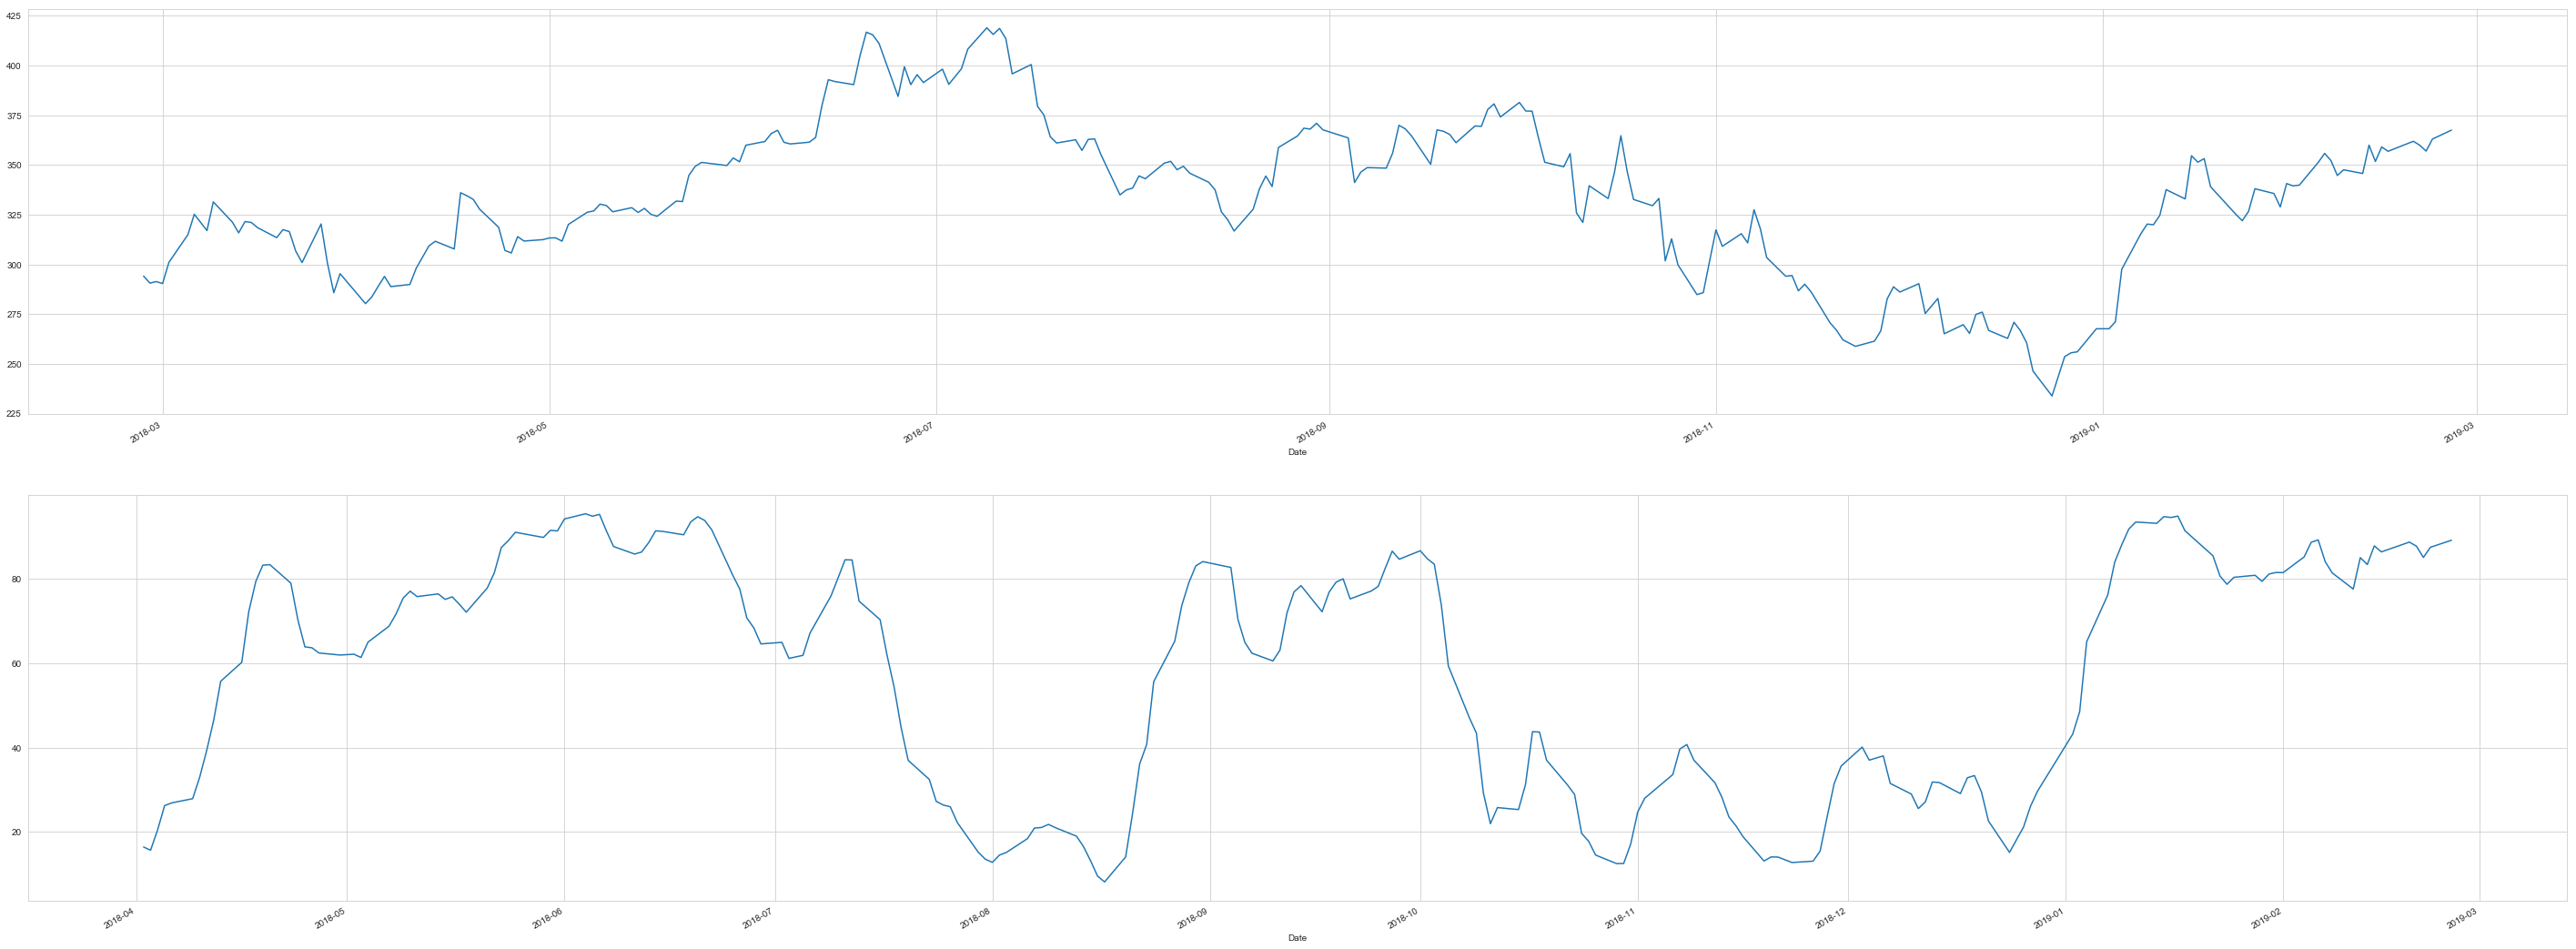

In [20]:
#14 Stochastic %D (STCD)
NFLX['STCD'] = NFLX['STCK'].ewm(com = 2 , min_periods = 3).mean()
plt.figure()
plt.subplot(2,1,1)
NFLX['Close'].plot(subplots=False,figsize=(50,20))
plt.subplot(2,1,2)
NFLX['STCD'].plot(subplots=False,figsize=(50,20))

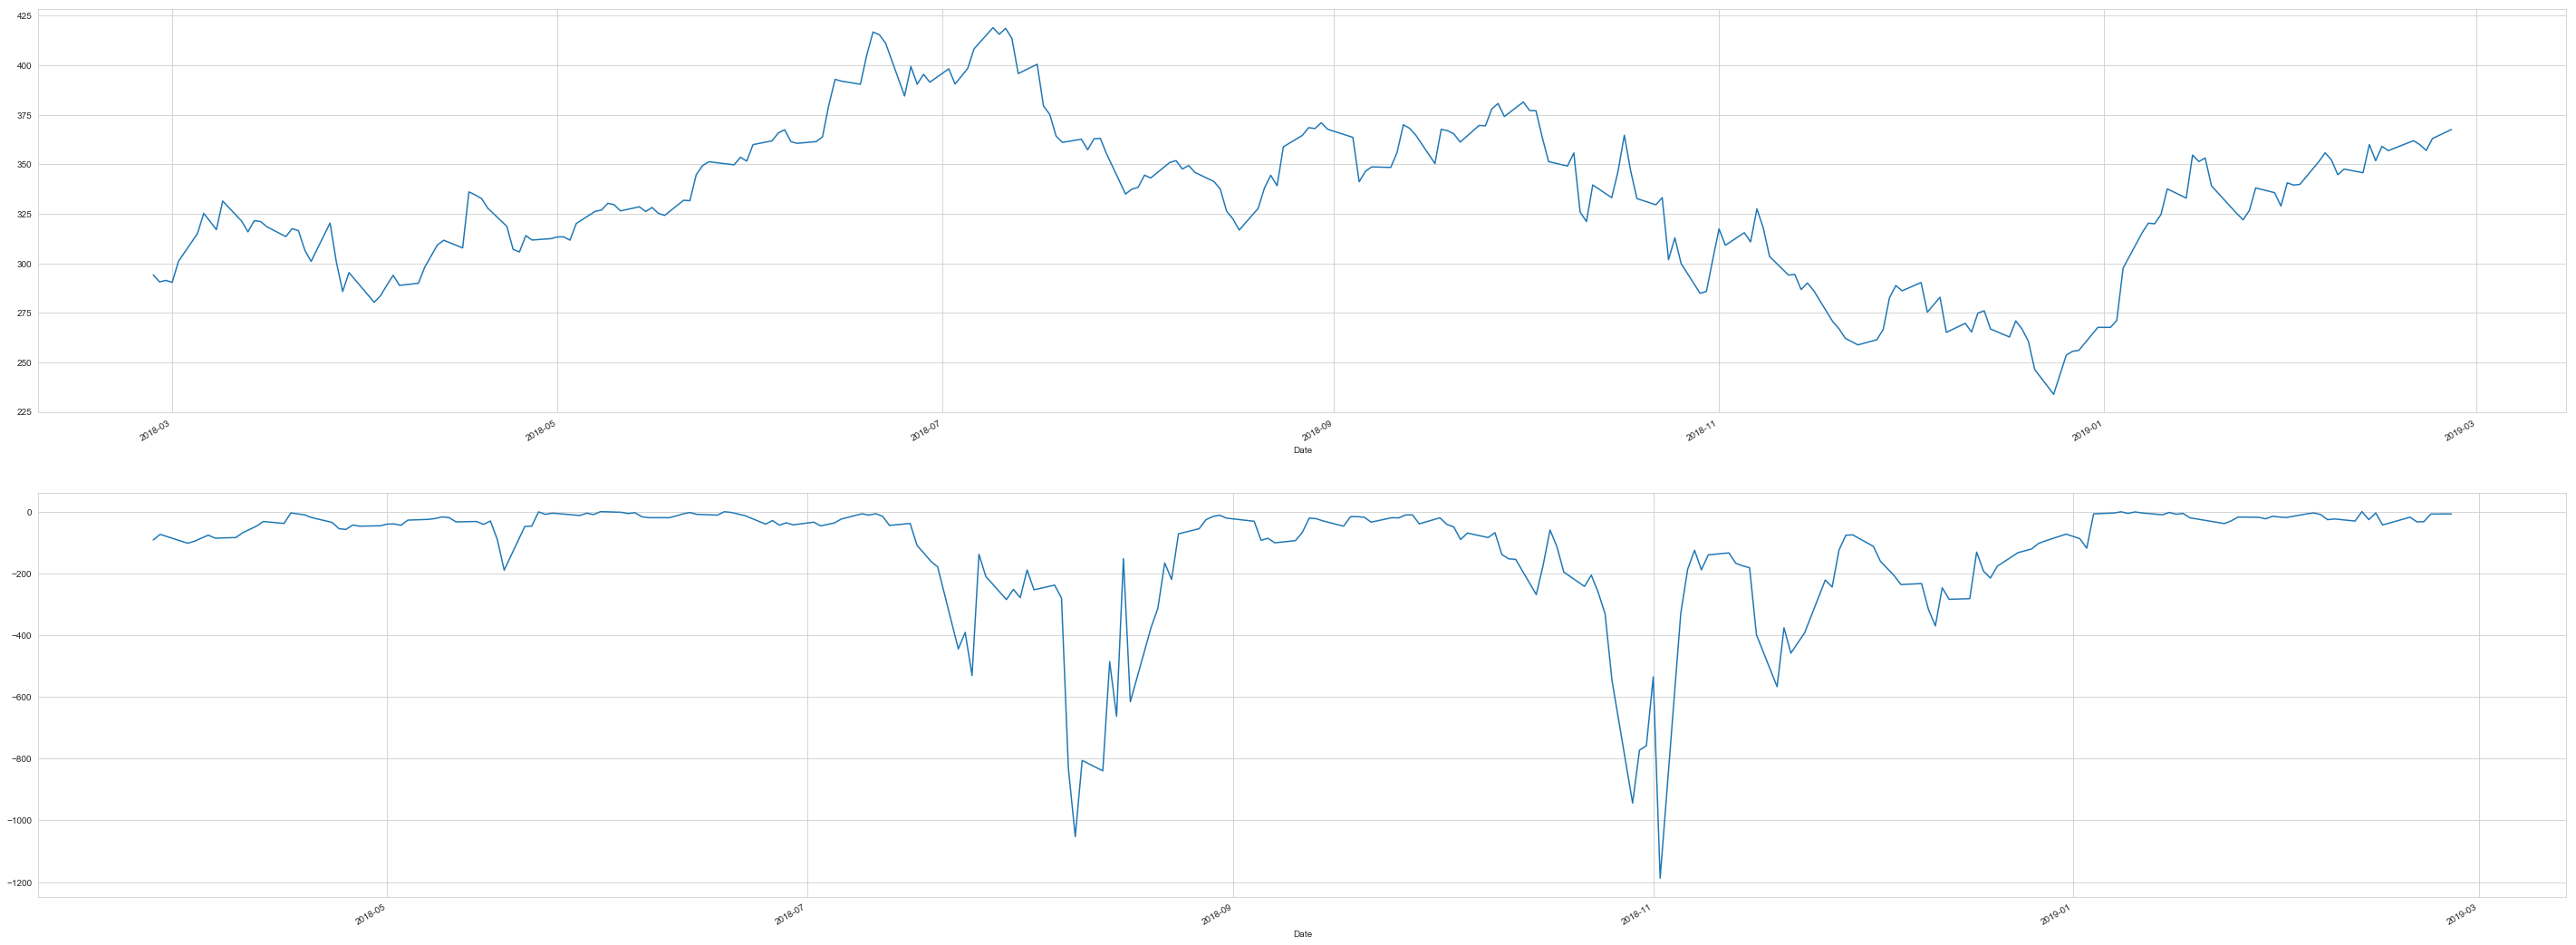

In [21]:
#15 Williams %R
def Highest(n,period):
    high=NFLX['High'][n]
    for i in range(n,n+period+1):
        if NFLX['High'][i] > high:
            high = NFLX['High'][i]
    return high
def Lowest(n,period):
    low=NFLX['Low'][n]
    for i in range(n,period+1):
        if NFLX['Low'][i] < low:
            low = NFLX['Low'][i]
    return low
WilliamsR = np.array([])
WilliamsR = np.append(WilliamsR, [np.nan]*emaPeriod)
for i in range(0,len(NFLX['Close'])-emaPeriod):
    high=Highest(i,emaPeriod)
    low=Lowest(i,emaPeriod)
    W = ((-100)*(high - NFLX['Close'][i+emaPeriod]))/((high - float(low)))
    WilliamsR = np.append(WilliamsR, W)
NFLX['WilliamsR'] = WilliamsR
plt.figure()
plt.subplot(2,1,1)
NFLX['Close'].plot(subplots=False,figsize=(50,20))
plt.subplot(2,1,2)
NFLX['WilliamsR'].plot(subplots=False,figsize=(50,20))

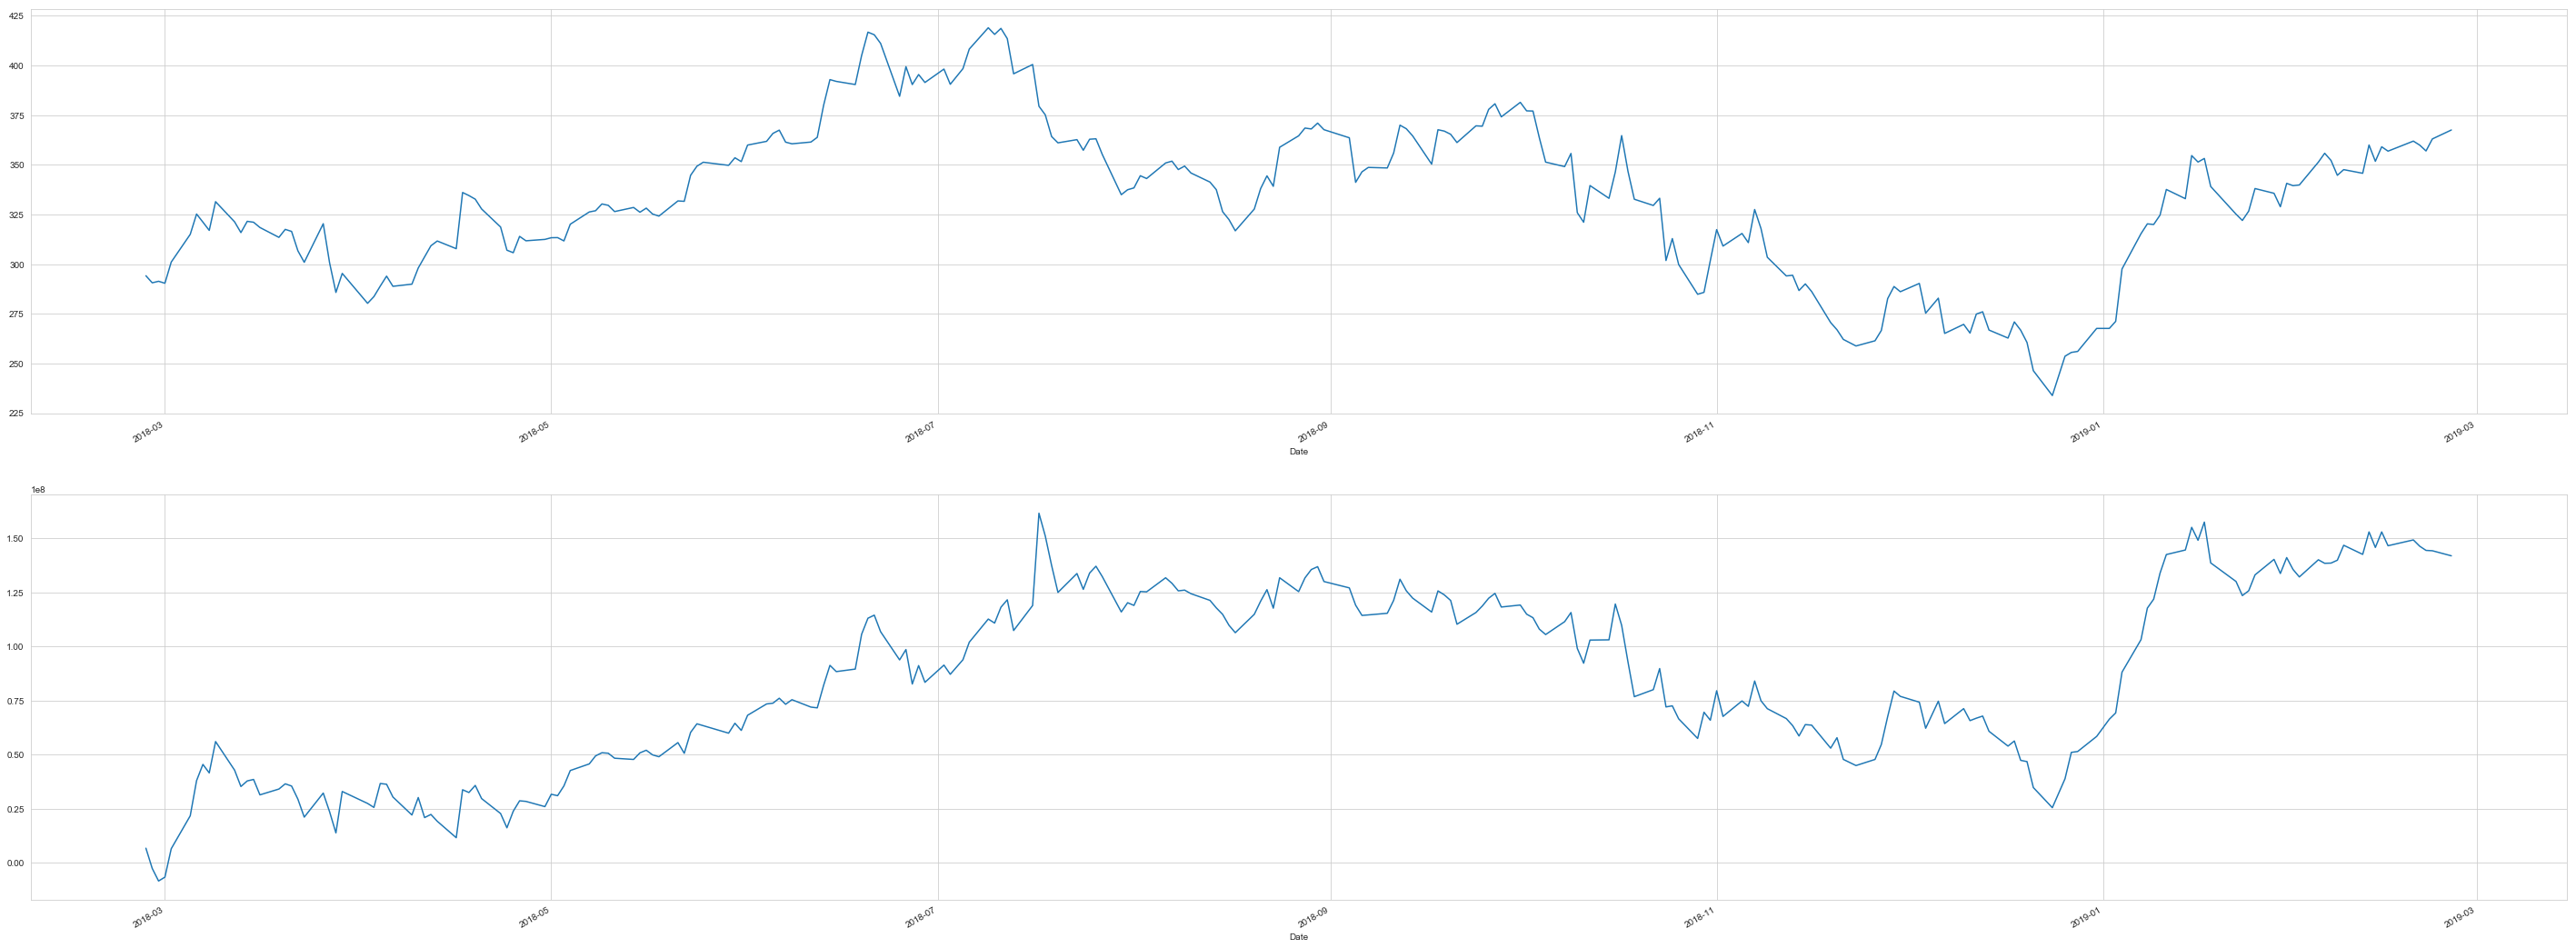

In [22]:
#16  Accumulation Distribution Oscillation (ADO)
NFLX['Multiplier']= (2*NFLX['Close']-NFLX['High']-NFLX['Low'])/(NFLX['High']-NFLX['Low'])
NFLX['MVolume']=NFLX['Multiplier']*NFLX['Volume']
ADL = np.array([])
ADL = np.append(ADL,NFLX['MVolume'][0])
for i in range(1,len(NFLX['Close'])):
    Adl = ADL[i-1] + NFLX['MVolume'][i]
    ADL = np.append(ADL,Adl)
NFLX['ADL'] = ADL
plt.figure()
plt.subplot(2,1,1)
NFLX['Close'].plot(subplots=False,figsize=(50,20))
plt.subplot(2,1,2)
NFLX['ADL'].plot(subplots=False,figsize=(50,20))

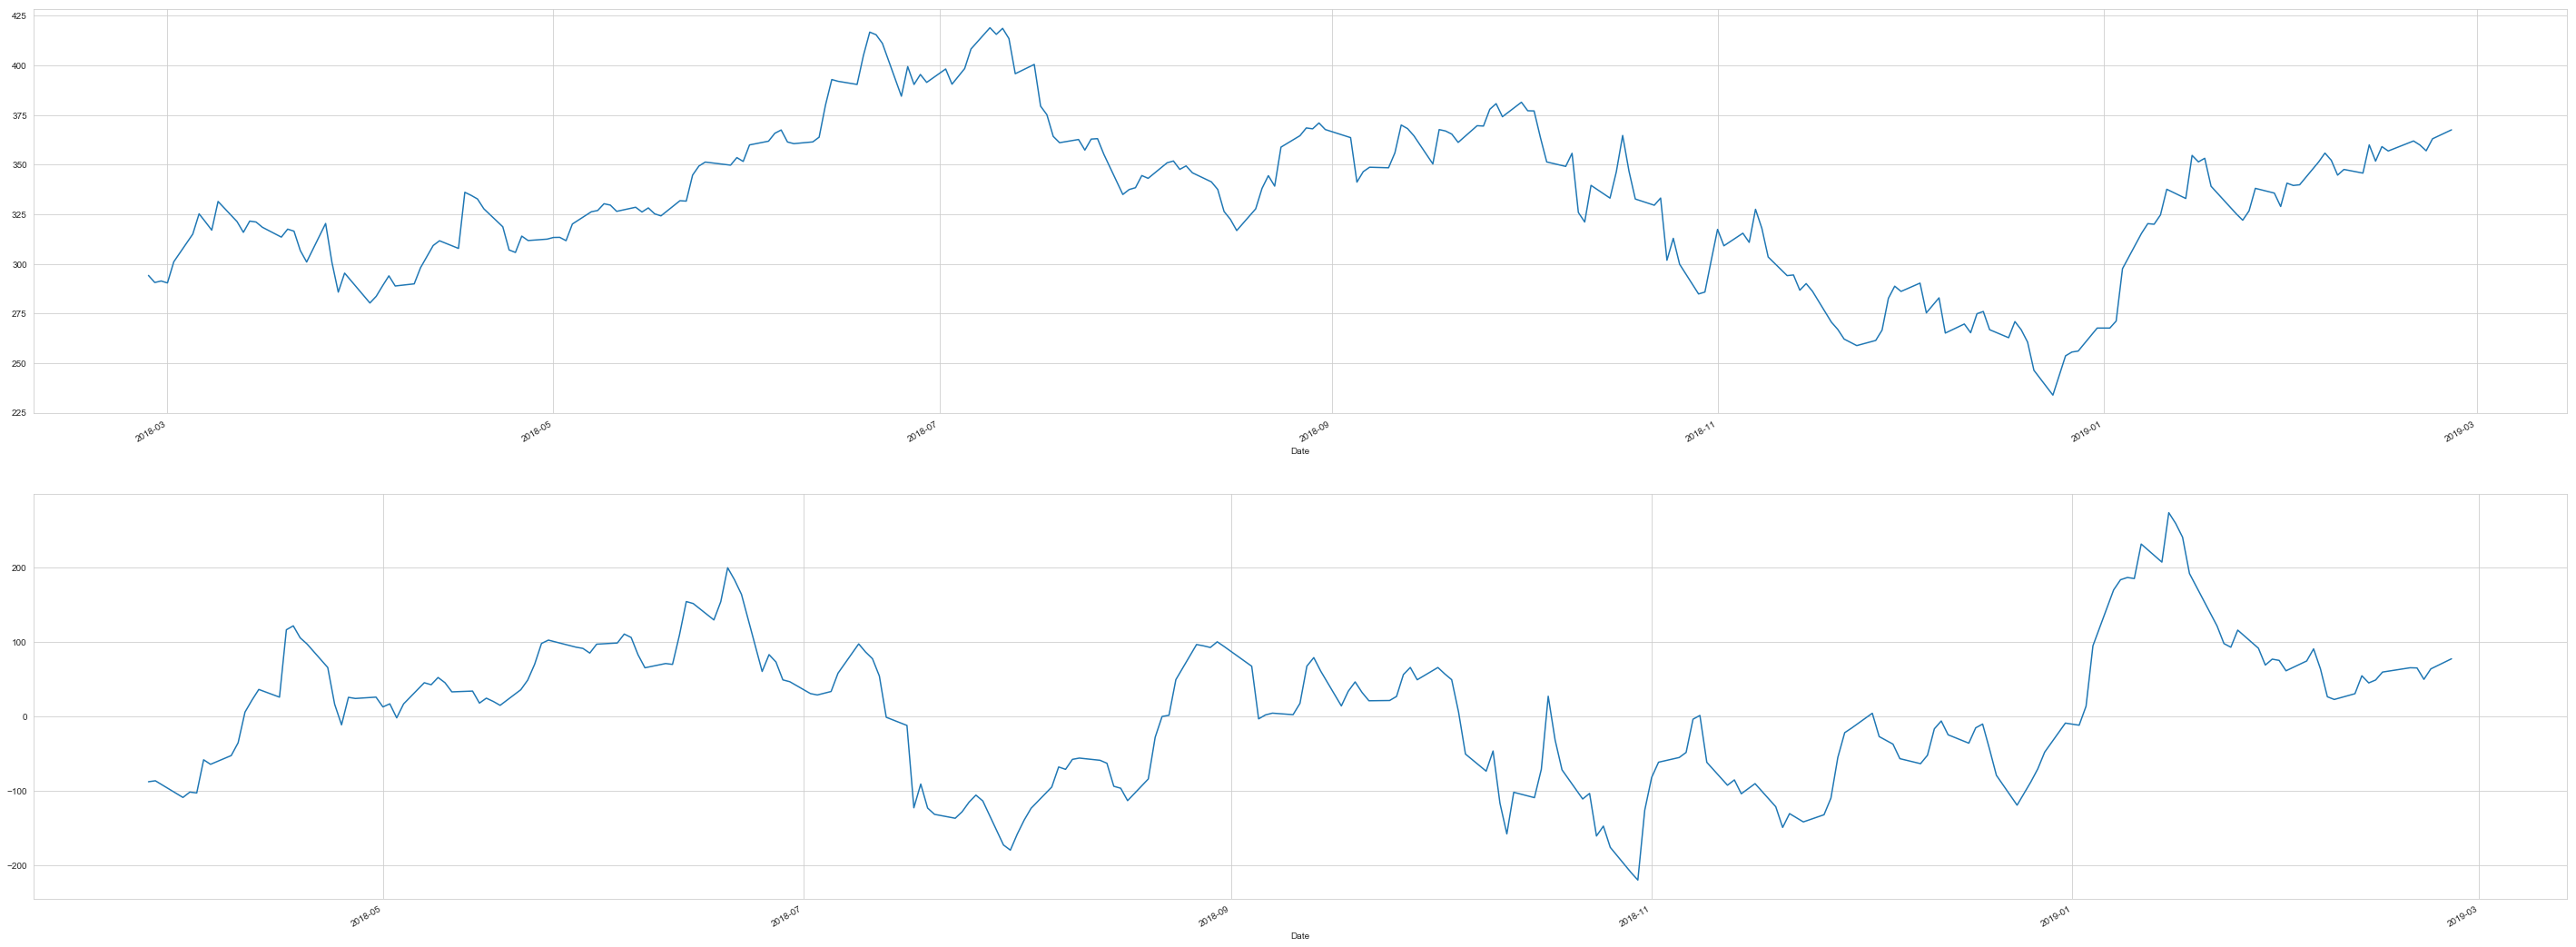

In [23]:
#17 Commodity Channel Index (CCI)
def mad(n,period):
    sum=0
    for i in range(n,n+period+1):
        sum+=abs(NFLX['TP']-NFLX['SMP of TP'])
    return high
NFLX['TP'] = (NFLX['Close']+NFLX['High']+NFLX['Low'])/3
NFLX['SMP of TP'] = NFLX['TP'].rolling(emaPeriod).mean()
MAD = np.array([])
MAD = np.append(MAD,[np.nan]*emaPeriod)
for i in range(0,len(NFLX['Close'])-emaPeriod):
    su = mad(i,emaPeriod)
    MAD = np.append(MAD,su/float(emaPeriod))
NFLX['MAD of TP'] = MAD
NFLX['CCI'] = (NFLX['TP'] - NFLX['SMP of TP'])/(0.015*NFLX['MAD of TP'])
plt.figure()
plt.subplot(2,1,1)
NFLX['Close'].plot(subplots=False,figsize=(50,20))
plt.subplot(2,1,2)
NFLX['CCI'].plot(subplots=False,figsize=(50,20))

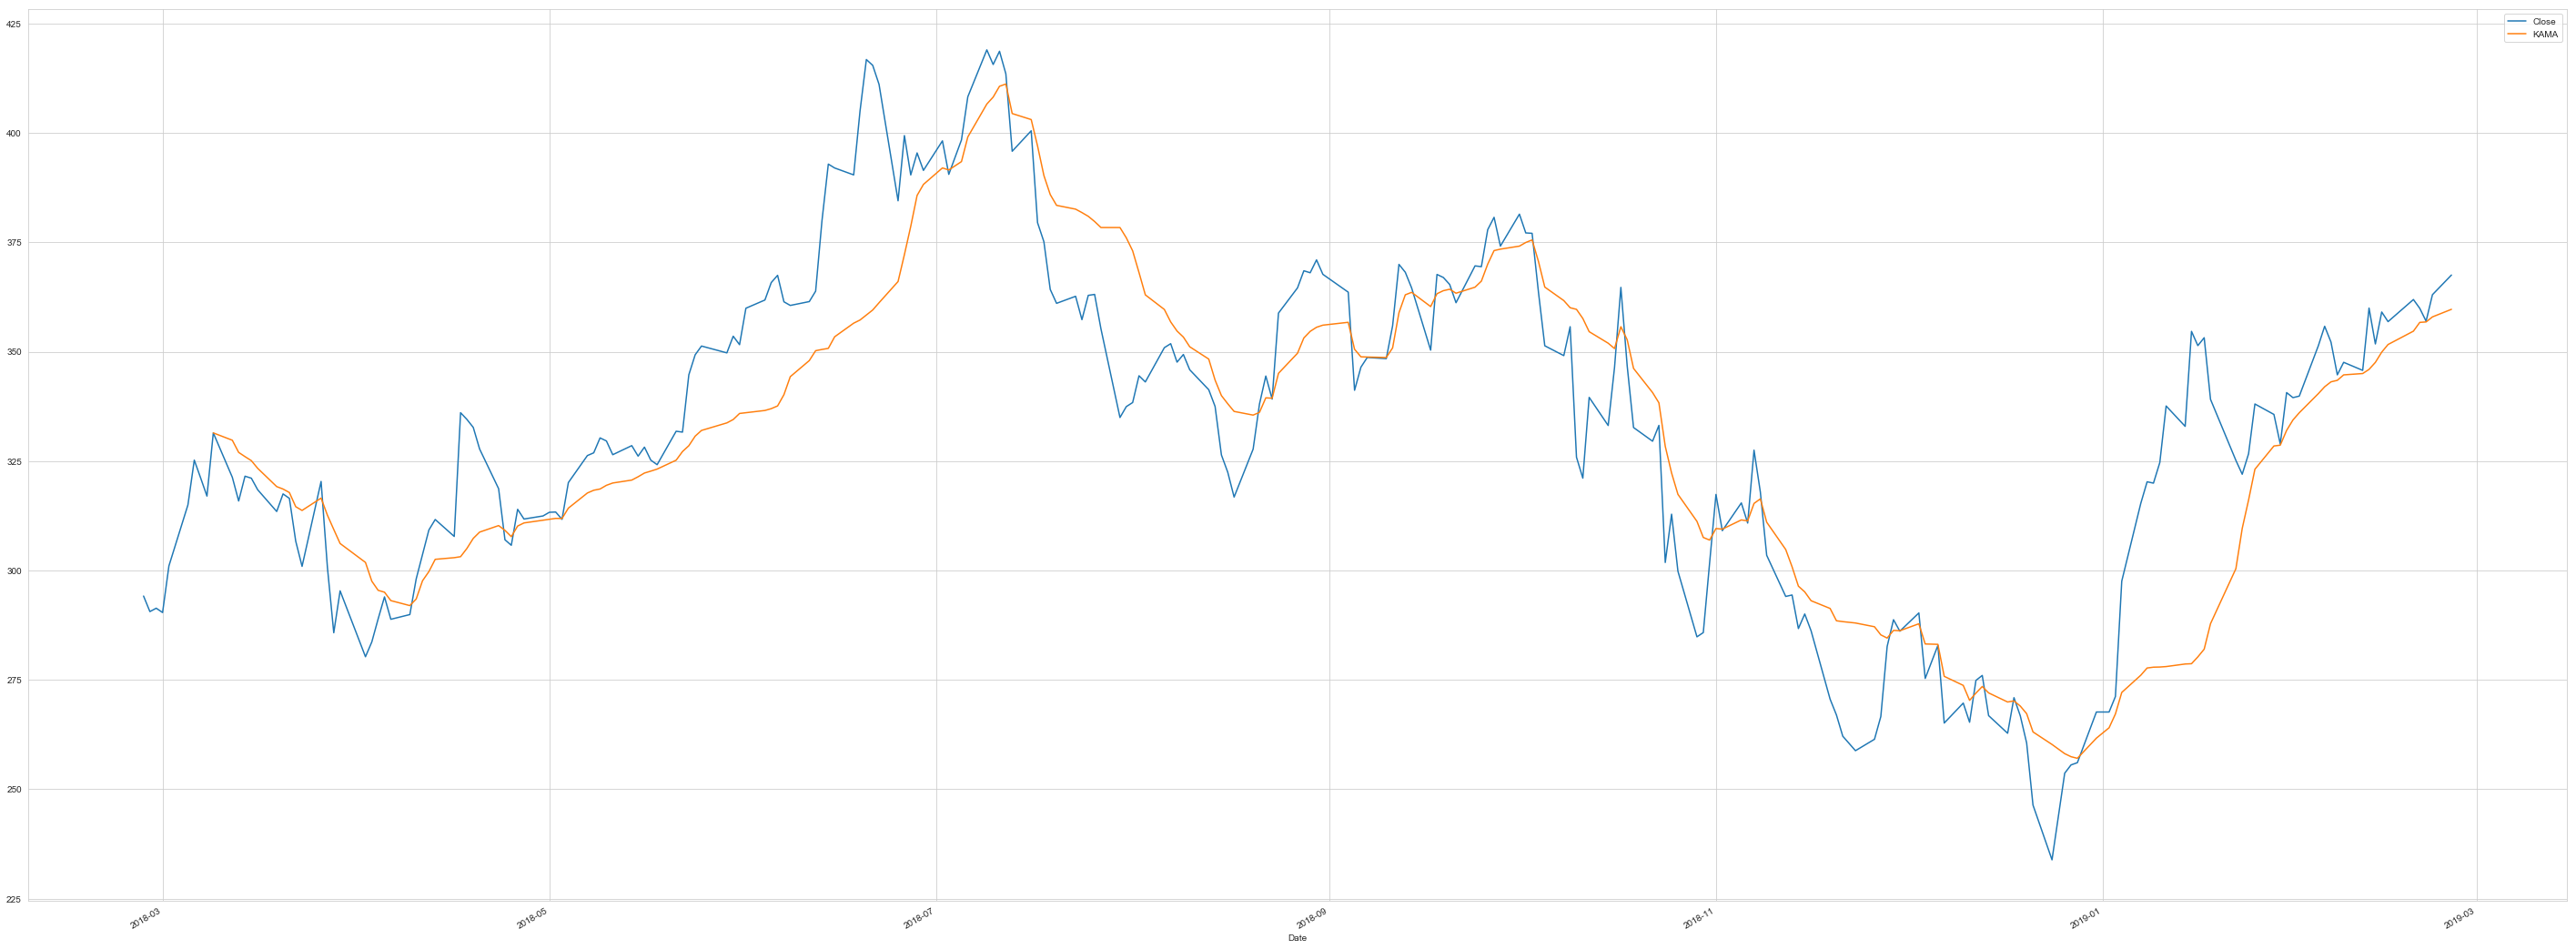

In [24]:
#18 Kaufman's Adaptive Moving Average (KAMA)
KAMA = np.array([])
KAMA = np.append(KAMA,[np.nan]*9)
KAMA = np.append(KAMA,NFLX['Close'][9])
Volitality = np.array([])
Volitality = np.append(Volitality, np.nan)
for i in range(1,len(NFLX['Close'])):
    Volitality = np.append(Volitality, abs(NFLX['Close'][i]-NFLX['Close'][i-1]))
Change = np.array([])
Change = np.append(Change,[np.nan]*10)
for i in range(10,len(NFLX['Close'])):
    Change = np.append(Change, abs(NFLX['Close'][i]-NFLX['Close'][i-10]))
ER = np.array([])
ER = np.append(ER, [np.nan]*10)
for i in range(1,len(NFLX['Close'])-9):
    sum=0;
    for j in range(i,i+9):
        sum+=Volitality[j]
    Val=Change[i+9]/sum
    ER = np.append(ER,Val)
SC = np.array([])
SC = np.append(SC, [np.nan]*10)
for i in range(10,len(NFLX['Close'])):
    slowest = 2.0/3.0
    fastest = 2.0/31.0
    S = pow((ER[i]*(fastest - slowest)+slowest),2)
    SC = np.append(SC, S)
for i in range(10,len(NFLX['Close'])):
    K = KAMA[i-1] + (NFLX['Close'][i]-KAMA[i-1])*SC[i]
    KAMA = np.append(KAMA,K)
NFLX['KAMA'] = KAMA
NFLX[['Close','KAMA']].plot(subplots=False,figsize=(50,20))

In [25]:
#Correlation
globals()['Samsung'] = DataReader('005930.KS','yahoo',start,end)
globals()['AAPL'] = DataReader('AAPL','yahoo',start,end)
globals()['MSFT'] = DataReader('MSFT','yahoo',start,end)
CP = DataReader(['005930.KS','AAPL','MSFT'], 'yahoo', start, end)['Close']
pct_cg = CP.pct_change()
pct_cg=pct_cg.dropna()
pct_cg.head()

Symbols     005930.KS      AAPL      MSFT
Date                                     
2018-02-27   0.000000 -0.003241 -0.012786
2018-02-28  -0.006754 -0.001514 -0.004565
2018-03-01   0.000000 -0.017516 -0.009811
2018-03-02  -0.022099  0.006914  0.002154
2018-03-05  -0.017818  0.003462  0.006341

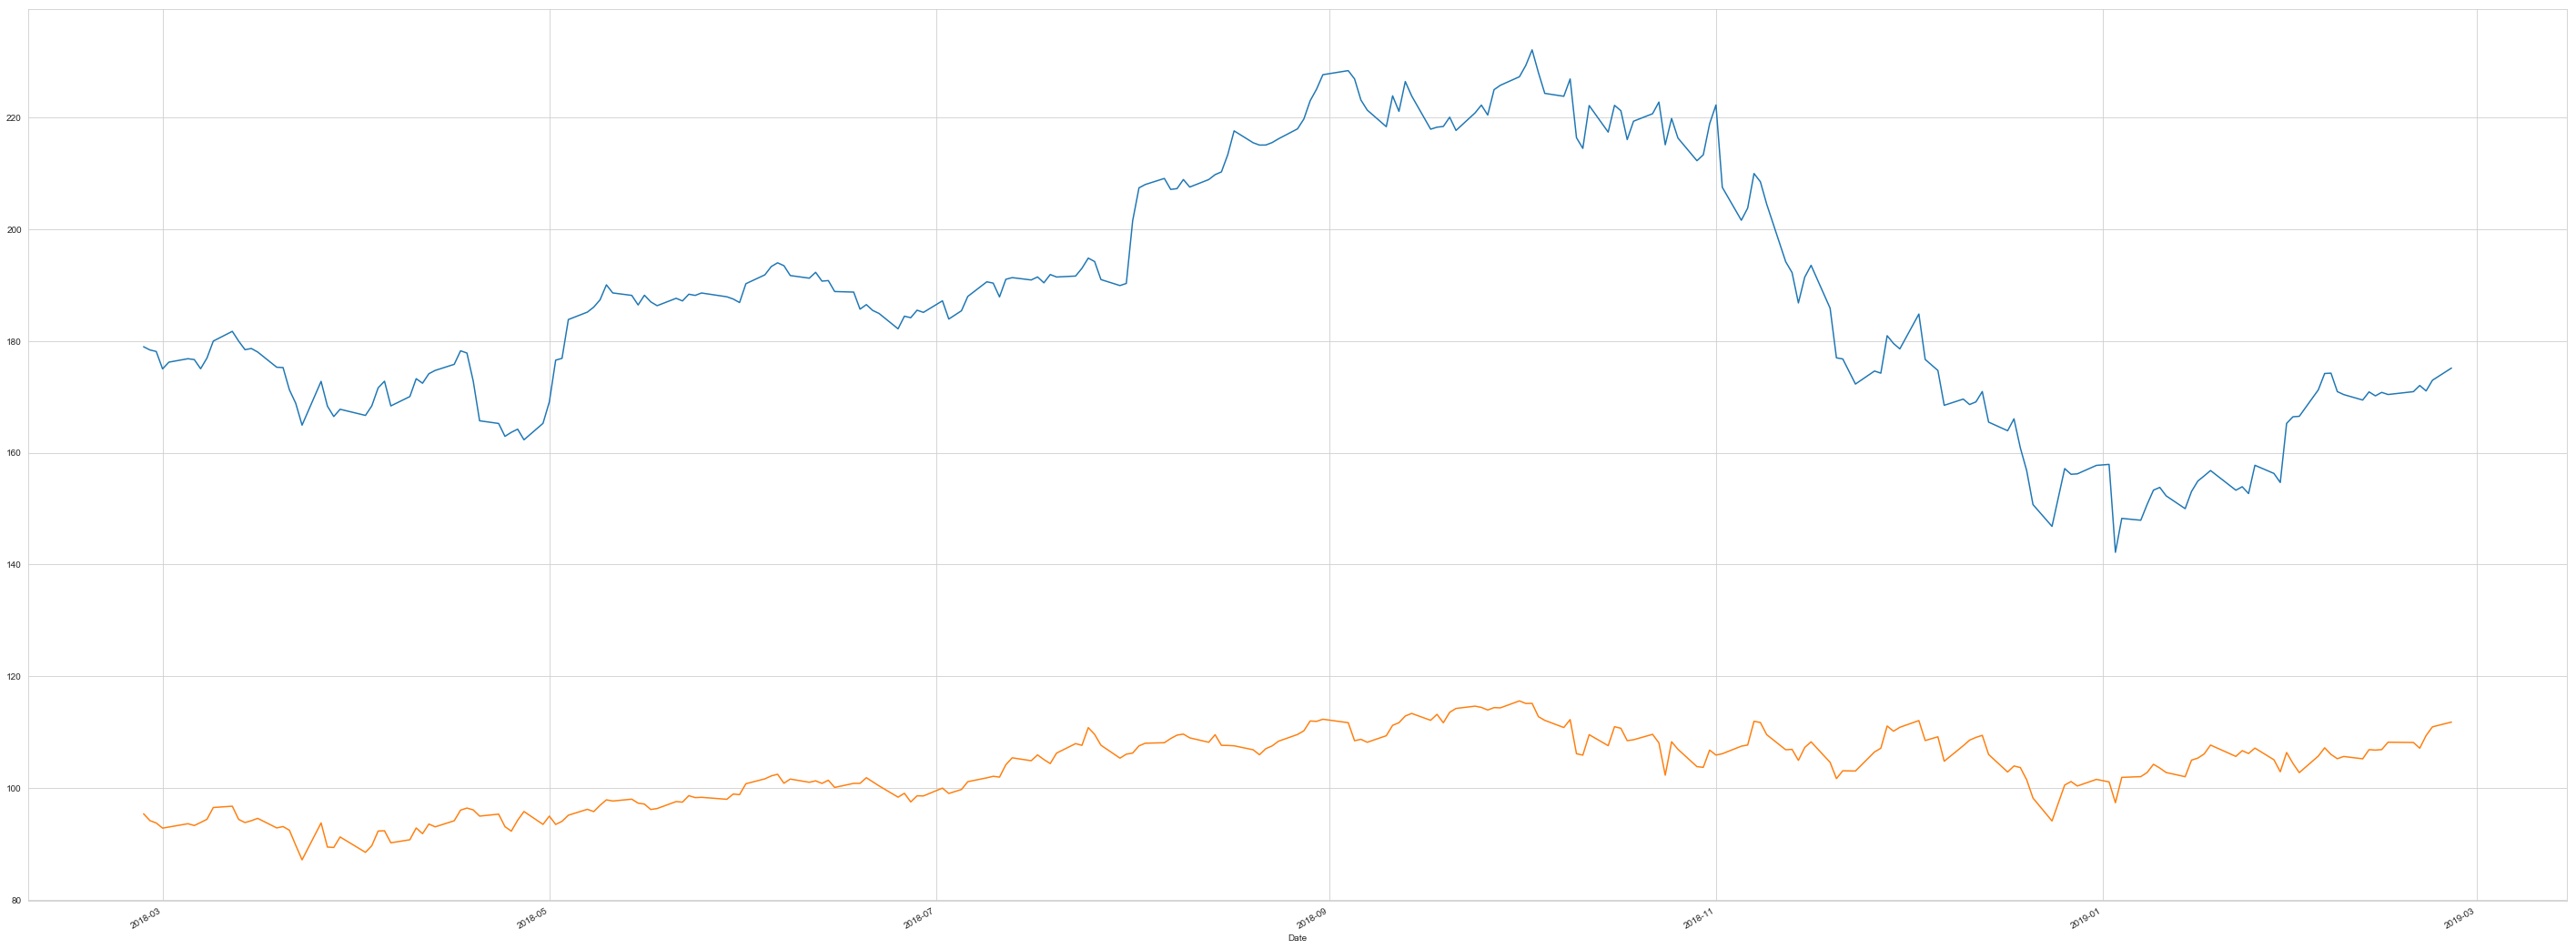

In [77]:
AAPL['Close'].plot(subplots=False,figsize=(50,20))
MSFT['Close'].plot(subplots=False,figsize=(50,20))

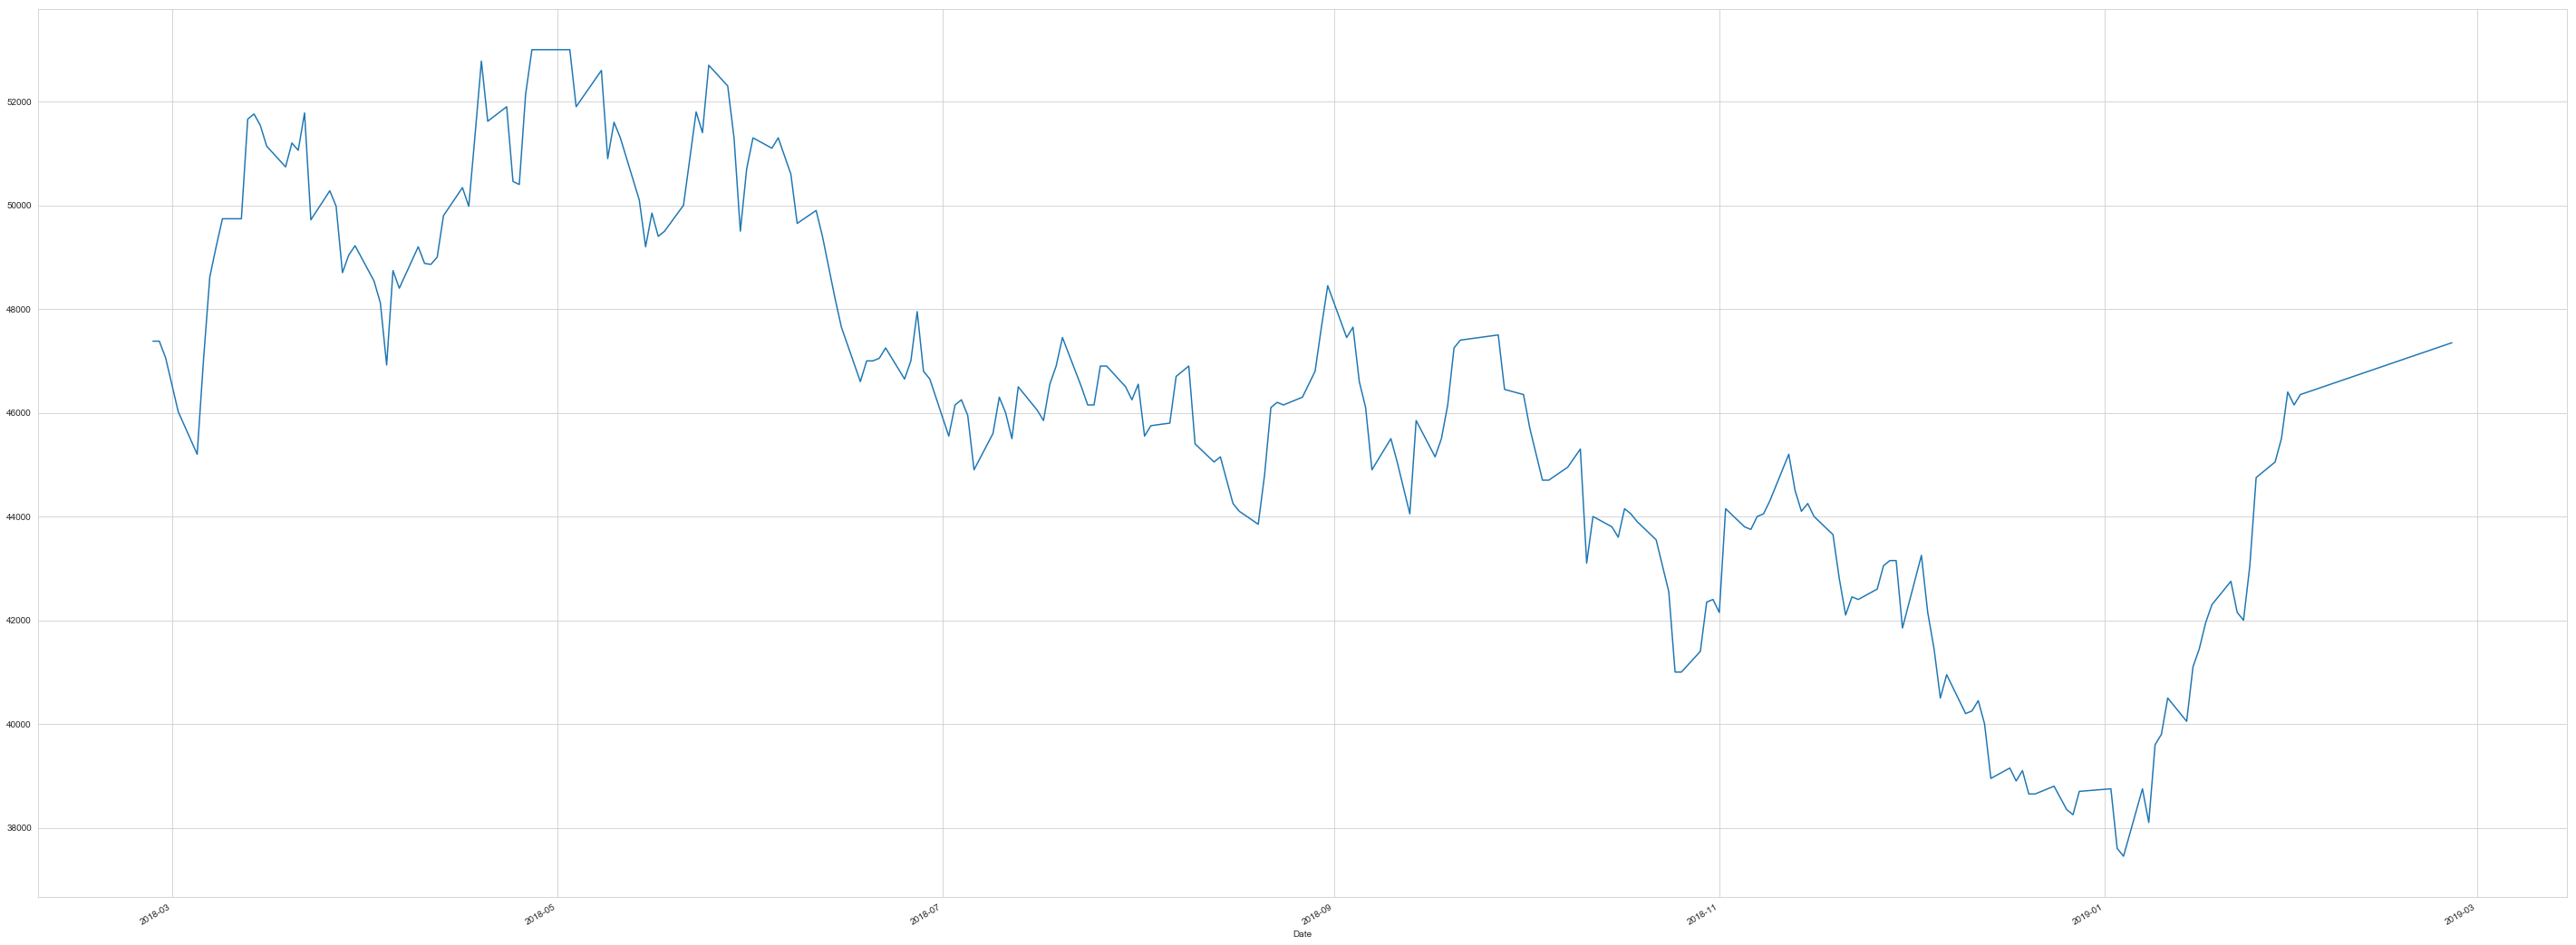

In [78]:
Samsung['Close'].plot(subplots=False,figsize=(50,20))

C:\Users\abc\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


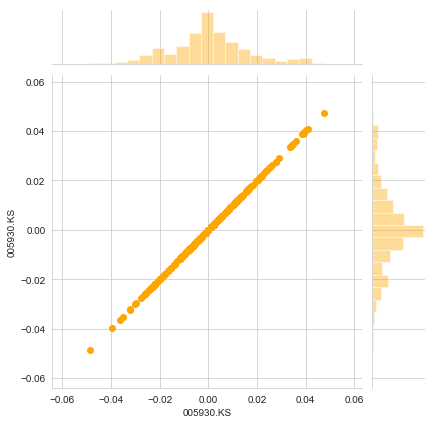

In [26]:
# Comparing Samsung to itself will show a perfectly positive correlaton
sns.jointplot('005930.KS','005930.KS',pct_cg,kind='scatter',color='orange')

C:\Users\abc\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


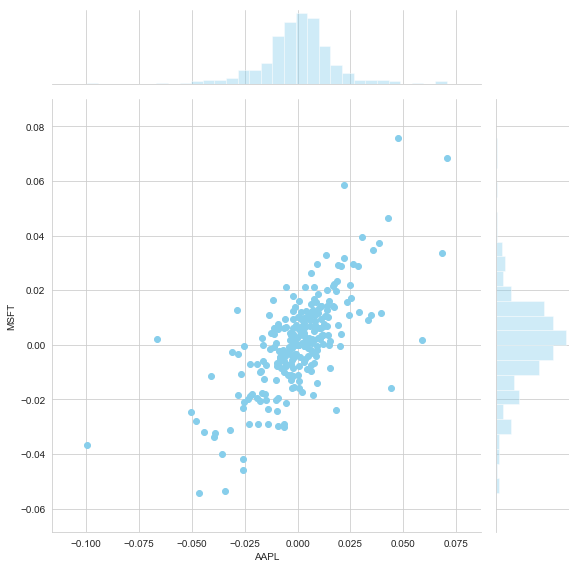

In [27]:
# We'll use joinplot to compare the daily returns of Apple and MS.
sns.jointplot('AAPL','MSFT',pct_cg, kind='scatter',size=8, color='skyblue')

C:\Users\abc\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


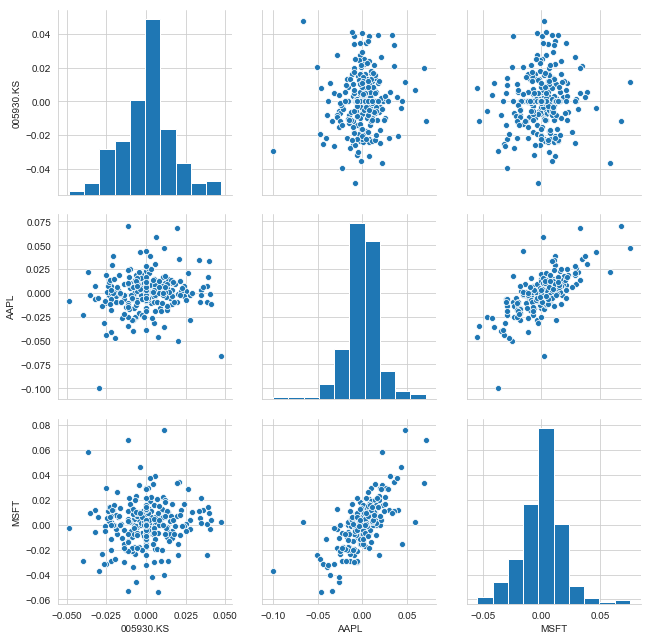

In [28]:
# We can simply call pairplot ans use it to correlate every feature
sns.pairplot(pct_cg,size=3)

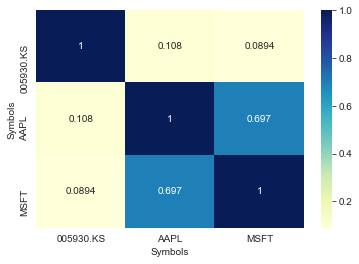

In [29]:
# Lets check out the correlation between closing prices of stocks
sns.heatmap(pct_cg.corr(),annot=True,fmt=".3g",cmap='YlGnBu')

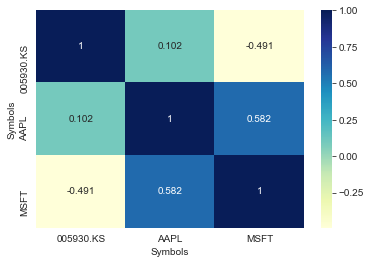

In [79]:
# Lets check out the correlation between closing prices of stocks
sns.heatmap(CP.corr(),annot=True,fmt=".3g",cmap='YlGnBu')

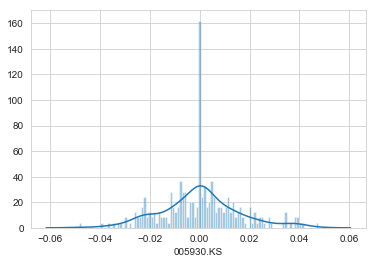

In [30]:
#Risk Analysis Bootstrap Method
sns.distplot(pct_cg['005930.KS'],bins=100)

In [31]:
pct_cg['005930.KS'].quantile(0.01)

-0.03567732492217619

The 0.01 empirical quantile of daily returns is at -0.0356. That means that with 99% confidence, our worst daily loss will not exceed 3.5%. If we have a 1 million dollar investment, our one-day 1% VaR is 0.035 * 1,000,000 = $35,000.

In [32]:
pct_cg['MSFT'].quantile(0.01)

-0.04359553324848144

In [33]:
pct_cg['AAPL'].quantile(0.01)

-0.048920264297243554

In [92]:
#Monte Carlo Simulation
#for MSFT
days = 260
last_price = CP['MSFT'][-1]
mu = pct_cg.mean()['MSFT']

In [81]:
def monteCarlo(start_price,days,mu):
    price = np.zeros(days)
    price[0] = start_price
    for x in range(1,days):
        price[x] = price[x-1]*(1+np.random.normal(0,mu))     
    return price

<Figure size 3600x1440 with 0 Axes>

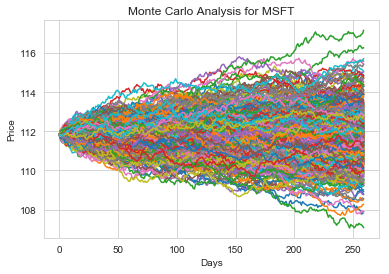

<Figure size 3600x1440 with 0 Axes>

In [82]:
for run in range(500):
    plt.plot(monteCarlo(last_price, days, mu))
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for MSFT')
plt.figure(figsize=(50,20))

In [95]:
#for AAPL
last_price = CP['AAPL'][-1]
mu = pct_cg.mean()['AAPL']

Text(0.5, 1.0, 'Monte Carlo Analysis for AAPL')

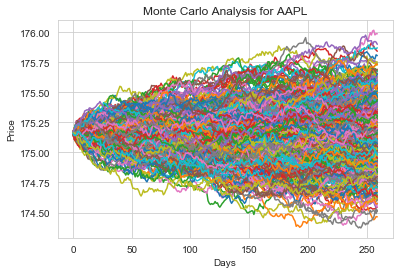

In [84]:
for run in range(500):
    plt.plot(monteCarlo(last_price, days, mu))
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for AAPL')

In [98]:
#for Samsumg
last_price = CP['005930.KS'][-1]
mu = pct_cg.mean()['005930.KS']

Text(0.5, 1.0, 'Monte Carlo Analysis for Samsung')

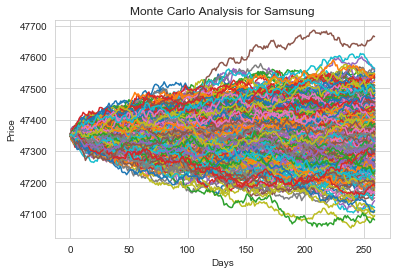

In [40]:
for run in range(500):
    plt.plot(monteCarlo(last_price, days, mu))
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Samsung')

In [93]:
# Lets Dive Deeper
# For MSFT Stocks
days = 260
last_price = CP['MSFT'][-1]
print(last_price)
# number of simulations
runs = 10000
simulations = np.zeros(runs)

for run in range(runs):
    simulations[run] = monteCarlo(last_price,days,mu)[days-1]

111.81999969482422


0    108.65089
Name: 0.01, dtype: float64

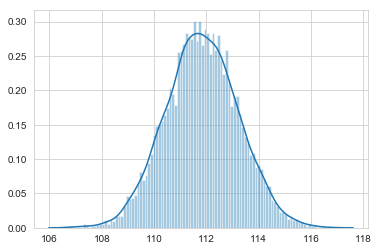

In [94]:
sns.distplot(simulations,bins=100)
sm = DataFrame(simulations)
sm.quantile(0.01)

In [96]:
# for AAPL Stocks
days = 260
last_price = CP['AAPL'][-1]
print(last_price)
# number of simulations
runs = 10000
simulations = np.zeros(runs)

for run in range(runs):
    simulations[run] = monteCarlo(last_price,days,mu)[days-1]

175.15969848632812


0    174.536894
Name: 0.01, dtype: float64

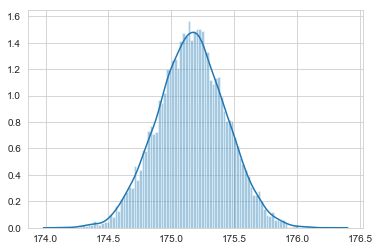

In [97]:
sns.distplot(simulations,bins=100)
sm = DataFrame(simulations)
sm.quantile(0.01)

In [99]:
# for Samsung Stock
last_price = CP['005930.KS'][-1]
print(last_price)
# number of simulations
runs = 10000
simulations = np.zeros(runs)

for run in range(runs):
    simulations[run] = monteCarlo(last_price,days,mu)[days-1]

47350.0


0    47135.177366
Name: 0.01, dtype: float64

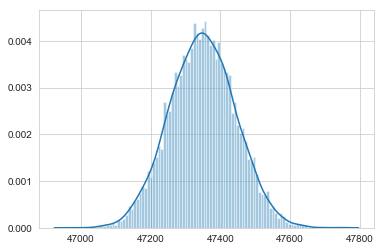

In [100]:
sns.distplot(simulations,bins=100)
sm = DataFrame(simulations)
sm.quantile(0.01)

In [53]:
#Stationarity
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

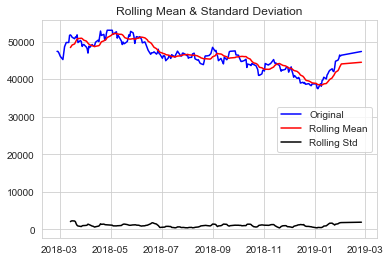

Results of Dickey-Fuller Test:
Test Statistic                  -1.569197
p-value                          0.499046
#Lags Used                       0.000000
Number of Observations Used    230.000000
Critical Value (1%)             -3.459106
Critical Value (5%)             -2.874190
Critical Value (10%)            -2.573512
dtype: float64


In [61]:
test_stationarity(Samsung['Close'])

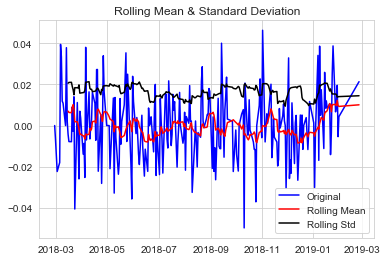

Results of Dickey-Fuller Test:
Test Statistic                -1.581478e+01
p-value                        1.036616e-28
#Lags Used                     0.000000e+00
Number of Observations Used    2.290000e+02
Critical Value (1%)           -3.459233e+00
Critical Value (5%)           -2.874245e+00
Critical Value (10%)          -2.573541e+00
dtype: float64


In [72]:
ts_log = np.log(Samsung['Close'])
ts_log_diff = ts_log - ts_log.shift()
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

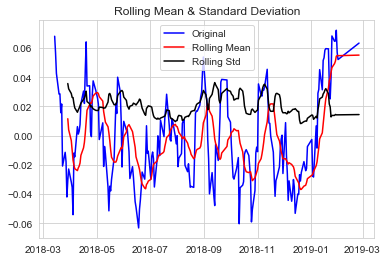

Results of Dickey-Fuller Test:
Test Statistic                  -4.026895
p-value                          0.001276
#Lags Used                       0.000000
Number of Observations Used    219.000000
Critical Value (1%)             -3.460567
Critical Value (5%)             -2.874830
Critical Value (10%)            -2.573853
dtype: float64


In [73]:
moving_avg = ts_log.rolling(12).mean()
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

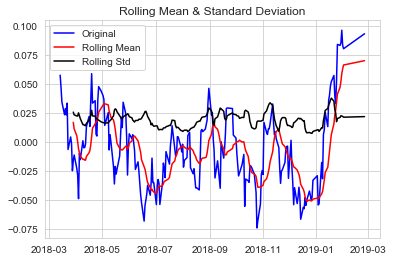

Results of Dickey-Fuller Test:
Test Statistic                  -3.127236
p-value                          0.024602
#Lags Used                       0.000000
Number of Observations Used    219.000000
Critical Value (1%)             -3.460567
Critical Value (5%)             -2.874830
Critical Value (10%)            -2.573853
dtype: float64


In [74]:
expwighted_avg = ts_log.ewm(com=11,min_periods =12).mean()
ts_log_ewma_diff = ts_log - expwighted_avg
ts_log_ewma_diff.dropna(inplace=True)
test_stationarity(ts_log_ewma_diff)